<h1 style='text-align:center;border:10px double;border-color:gray;'>
    <br/>
     PROJET 5<br/>
    <br/>
    <font color = 'Navy'>"Segmentez des clients d'un site e-commerce"</font>
    <br/>
    <br/>
    
</h1>
<h4 style='text-align:left;border-color:gray;'>
    <br/>
    <font color = 'Navy'>* notebook de l'analyse exploratoire</font>
    <br/>
</h4>

 Dirigé par :   [Pouria Forouzesh](https://www.linkedin.com/in/pouria-forouzesh/)

## Rappel du contexte :

Vous êtes consultant pour [Olist](https://olist.com/pt-br/), une entreprise brésilienne qui propose une solution de vente sur les marketplaces en ligne.

![texte alternatif](olist.png)



Olist souhaite que vous fournissiez à ses équipes d'e-commerce une **segmentation des clients** qu’elles pourront utiliser au quotidien pour leurs campagnes de communication.

Votre objectif est de **comprendre les différents types d’utilisateurs** grâce à leur comportement et à leurs données personnelles.

Vous devrez fournir à l’équipe marketing une description actionable de votre segmentation et de sa logique sous-jacente pour une utilisation optimale, ainsi qu’une **proposition de contrat de maintenance** basée sur une analyse de la stabilité des segments au cours du temps.

**Les données**

Pour cette mission, Olist vous fournit [une base de données](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?resource=download) anonymisée comportant des informations sur l’historique de commandes, les produits achetés, les commentaires de satisfaction, et la localisation des clients depuis janvier 2017.

### Votre mission

Votre mission est d’aider les équipes d’Olist à comprendre les différents types d'utilisateurs. Vous utiliserez donc des méthodes non supervisées pour regrouper des clients de profils similaires. Ces catégories pourront être utilisées par l’équipe Marketing pour mieux communiquer.

Après quelques premières analyses, vous vous rendez compte qu’Olist ne vous a pas fourni beaucoup de données ; vous enquêtez donc auprès de l’entreprise pour obtenir quelques informations complémentaires, et vérifier que vous avez bien compris la mission. Voici sa réponse.

Vous réalisez donc trois autres documents afin de préparer une réponse à Olist : 

- un notebook avec des essais des différentes approches de modélisation ;
- un notebook de simulation pour déterminer la fréquence nécessaire de mise à jour du modèle de segmentation, afin que celui-ci reste pertinent ; 
- une présentation pour un collègue afin d’obtenir ses retours sur votre approche.

Voici les étapes que vous pouvez suivre :

Étape 1: Compréhension des données et des objectifs
- Analysez les données fournies par Olist pour comprendre leur structure, les variables disponibles et leur signification.
- Familiarisez-vous avec les objectifs de segmentation d'Olist et identifiez les informations nécessaires pour atteindre ces objectifs.

Étape 2: Prétraitement des données
- Identifiez les variables pertinentes à utiliser pour la segmentation des clients.
- Effectuez des opérations de nettoyage des données, telles que la gestion des valeurs manquantes, la suppression des doublons et la conversion des formats de données si nécessaire.

Étape 3: Exploration des données
- Effectuez une analyse exploratoire des données pour obtenir des insights préliminaires sur les clients.
- Identifiez les tendances, les schémas et les relations entre les variables qui pourraient être utiles pour la segmentation.

Étape 4: Choix et application d'une méthode de segmentation
- Sélectionnez une méthode de segmentation appropriée en fonction des objectifs d'Olist et des caractéristiques des données.
- Appliquez la méthode de segmentation choisie pour regrouper les clients en segments homogènes.

Étape 5: Interprétation des segments
- Analysez les caractéristiques des segments obtenus et identifiez les différences et les similarités entre les segments.
- Donnez une description claire et concise de chaque segment, en mettant en évidence les comportements et les caractéristiques clés des clients de chaque segment.

Étape 6: Proposition de contrat de maintenance
- Analysez la stabilité des segments au fil du temps en effectuant une simulation.
- Proposez un contrat de maintenance qui spécifie la fréquence nécessaire de mise à jour du modèle de segmentation pour maintenir sa pertinence.

Étape 7: Préparation de la présentation
- Créez une présentation pour votre collègue afin de lui expliquer votre approche et d'obtenir ses retours.
- Structurez votre présentation de manière claire et concise, en mettant l'accent sur les résultats, les insights obtenus et les actions recommandées.



Pour déterminer quelles colonnes sont pertinentes à garder pour la segmentation des clients, vous devriez prendre en compte les objectifs spécifiques d'Olist et les informations qui pourraient être utiles pour comprendre et regrouper les clients de manière significative.

Voici quelques colonnes potentiellement pertinentes à considérer dans le jeu de données d'Olist :

1. Identifiants des clients :
   - customer_id : identifiant unique pour chaque client ✅
   - unique_id : identifiant unique pour chaque client enregistré ✅

2. Données démographiques et de localisation :
   - zip_code_prefix : préfixe du code postal du client ✅
   - city : ville du client ✅
   - state : État du client ✅

3. Historique des commandes :
   - order_id : identifiant unique pour chaque commande ✅
   - order_purchase_timestamp : horodatage de l'achat ✅
   - order_approved_at : horodatage de l'approbation de la commande ✅
   - order_delivered_customer_date : horodatage de la livraison de la commande au client ✅
   - order_estimated_delivery_date : date estimée de livraison de la commande ✅
   - order_status : statut de la commande (livrée, en cours de livraison, annulée, etc.) ✅
   - payment_sequential : séquence de paiement pour chaque commande
   - payment_installments : nombre d'installments choisis pour le paiement
   - freight_value : coût du fret pour la livraison de la commande ✅
   - review_id : identifiant unique pour chaque évaluation laissée par un client

4. Informations sur les produits :
   - product_id : identifiant unique pour chaque produit ✅
   - product_category_name : catégorie du produit ✅

Cependant, la pertinence des colonnes peut varier en fonction des objectifs spécifiques de segmentation d'Olist et des informations disponibles dans le jeu de données. Il est recommandé d'examiner attentivement chaque colonne et de décider quelles informations sont les plus importantes pour atteindre les objectifs de segmentation.

In [1]:
from IPython.display import display, HTML
from datetime import datetime
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import plotly
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import plotly.express as px
import time 
#import scipy
#from scipy.stats import normaltest
import sys


#%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)

# Versions
print('Version des librairies utilisées :')

print('NumPy                 : ' + np.version.full_version)
print('Pandas                : ' + pd.__version__)
print('Python                : ' + sys.version)
print('Plotly                : ' + plotly.__version__)
#print('Matplotlib            : ' + mpl.__version__)
#print('Scipy                 : '+ scipy.__version__)
print('Seaborn               : ' + sns.__version__)
#print('Sklearn               : ' + sklearn.__version__)
#print('jyquickhelper         : ' + jyquickhelper.__version__)



Version des librairies utilisées :
NumPy                 : 1.23.5
Pandas                : 1.5.3
Python                : 3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]
Plotly                : 5.9.0
Seaborn               : 0.12.2


## 1- pré-analyse

#### product_category_name_translation

**INFO**

In [2]:
product_category_name_translation = pd.read_csv('Datasets//product_category_name_translation.csv')
product_category_name_translation.columns = ['category_name', 'english_name']

display(HTML("<b>Null values:</b>"))
display(product_category_name_translation.isnull().sum())

display(HTML("<br><br><b>INFO:</b>"))
display(product_category_name_translation.info())

display(HTML("<br><br><b>duplicated:</b>"))
display(product_category_name_translation.duplicated().sum())

display(HTML("<br><br><b>Describe:</b>"))
display(product_category_name_translation.describe(include='all'))

print('_'*110)


product_category_name_translation.head()

category_name    0
english_name     0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   category_name  71 non-null     object
 1   english_name   71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


None

0

,category_name,english_name
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


______________________________________________________________________________________________________________


,category_name,english_name
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


#### olist_customers_dataset

**INFO**

In [3]:
customers = pd.read_csv('Datasets//olist_customers_dataset.csv')
customers.columns = ['customer_id', 'unique_id', 'zip_code_prefix', 'city', 'state']

display(HTML("<b>Null values:</b>"))
display(customers.isnull().sum())

display(HTML("<br><br><b>INFO:</b>"))
display(customers.info())

display(HTML("<br><br><b>duplicated:</b>"))
display(customers.duplicated().sum())

display(HTML("<br><br><b>Describe:</b>"))
display(customers.describe(include='all'))

print('_'*110)

customers.head()

customer_id        0
unique_id          0
zip_code_prefix    0
city               0
state              0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customer_id      99441 non-null  object
 1   unique_id        99441 non-null  object
 2   zip_code_prefix  99441 non-null  int64 
 3   city             99441 non-null  object
 4   state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


None

0

,customer_id,unique_id,zip_code_prefix,city,state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


______________________________________________________________________________________________________________


,customer_id,unique_id,zip_code_prefix,city,state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Visualisation**

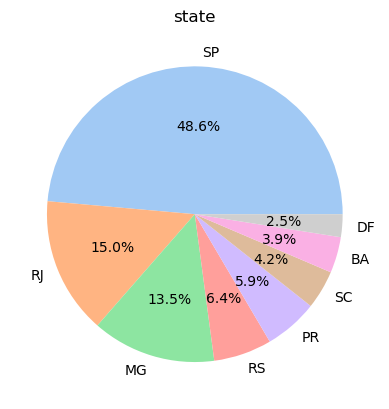

In [4]:
client = customers['state'].value_counts().head(8)
labels = client.index
colors = sns.color_palette('pastel')
plt.pie(client, labels = labels, colors = colors, autopct = '%0.1f%%')
plt.title('state')
plt.show()

In [5]:
customers_sp = customers['state'] == 'SP'
df_customers_sp = customers[customers_sp]


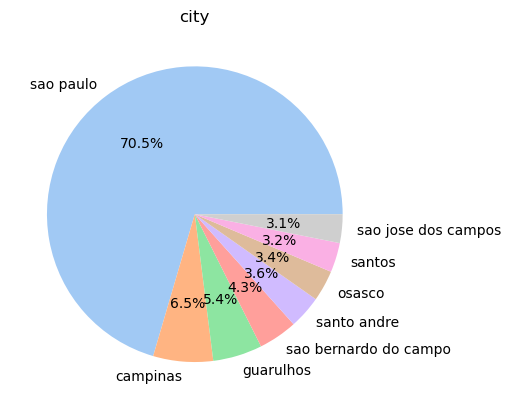

In [6]:
client2 = df_customers_sp['city'].value_counts().head(8)
labels2 = client2.index
colors = sns.color_palette('pastel')
plt.pie(client2, labels = labels2, colors = colors, autopct = '%0.1f%%')
plt.title('city')
plt.show()

#### olist_geolocation_dataset

**INFO**

In [7]:
geolocation = pd.read_csv('Datasets//olist_geolocation_dataset.csv')
geolocation.columns = ['zip_code_prefix', 'Latitude', 'Longitude', 'city', 'state']

display(HTML("<b>Null values:</b>"))
display(geolocation.isnull().sum())

display(HTML("<br><br><b>INFO:</b>"))
display(geolocation.info())

display(HTML("<br><br><b>duplicated:</b>"))
display(geolocation.duplicated().sum())

display(HTML("<br><br><b>Describe:</b>"))
display(geolocation.describe(include='all'))

print('_'*110)

geolocation.head()

zip_code_prefix    0
Latitude           0
Longitude          0
city               0
state              0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   zip_code_prefix  1000163 non-null  int64  
 1   Latitude         1000163 non-null  float64
 2   Longitude        1000163 non-null  float64
 3   city             1000163 non-null  object 
 4   state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


None

261831

,zip_code_prefix,Latitude,Longitude,city,state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


______________________________________________________________________________________________________________


,zip_code_prefix,Latitude,Longitude,city,state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**Visualisation**

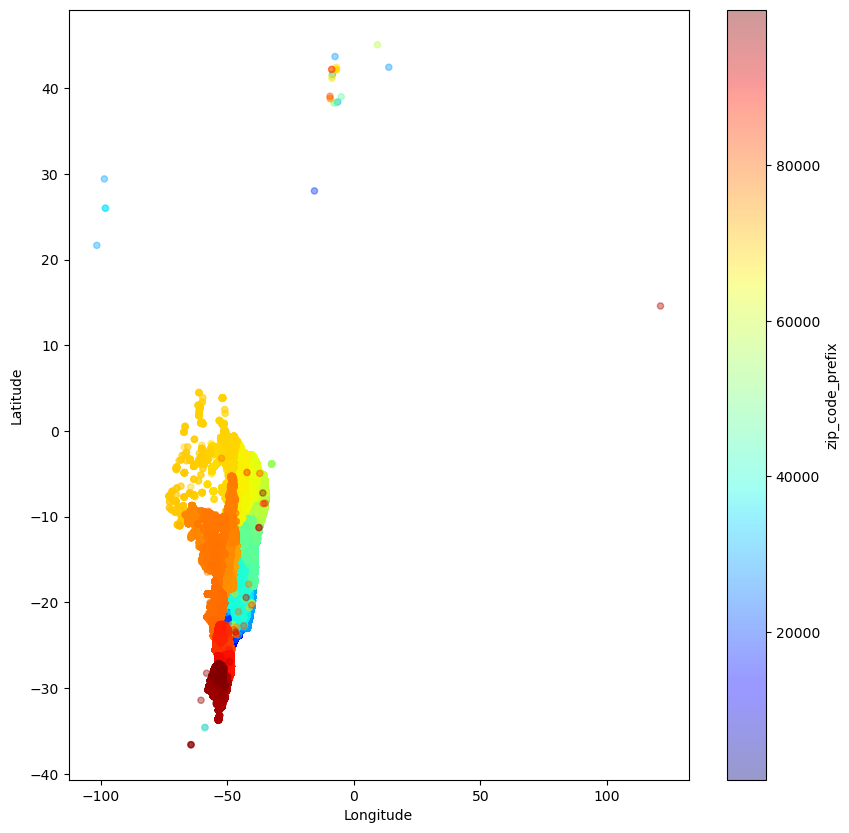

In [8]:
# Affichage graphique des zip_code_prefix,
# des latitudes et longitudes associées
geolocation.plot(kind="scatter", x="Longitude", y="Latitude",
         alpha=0.4, c="zip_code_prefix",
         cmap=plt.get_cmap("jet"), colorbar=True, figsize=(10, 10))
plt.show()

#### olist_order_items_dataset

**INFO**

Les colonnes mentionnées font référence à des informations couramment utilisées dans le contexte d'un système de commande en ligne. Voici une explication de chacune d'entre elles :

1. `order_id`: C'est un identifiant unique associé à chaque commande. Chaque commande passée aura un order_id différent.

2. `order_item_id`: Il s'agit d'un identifiant spécifique à chaque élément d'une commande. Si une commande contient plusieurs produits, chaque produit aura un order_item_id distinct. Cela permet de faire référence à des éléments spécifiques d'une commande lors de l'analyse des données.

3. `product_id`: C'est l'identifiant unique attribué à chaque produit. Chaque produit vendu aura son propre product_id.

4. `seller_id`: Il s'agit de l'identifiant unique associé à chaque vendeur. Lorsqu'une commande est passée, elle peut provenir d'un vendeur spécifique, et cet identifiant permet de suivre les ventes réalisées par chaque vendeur.

5. `shipping_limit_date`: C'est la date limite d'expédition prévue pour la commande. Elle indique la date à laquelle le vendeur doit expédier les produits commandés.

6. `price`: C'est le prix unitaire du produit. Il représente le montant facturé pour chaque unité du produit.

7. `freight_value`: Il s'agit du coût d'expédition associé à la commande. Ce montant correspond aux frais de livraison et peut varier en fonction de divers facteurs tels que la distance à parcourir, le poids du colis, etc.

Ces colonnes sont souvent utilisées dans l'analyse de données pour comprendre les détails des commandes, les produits vendus, les performances des vendeurs et les coûts d'expédition associés aux transactions.

In [9]:
order_items = pd.read_csv('Datasets//olist_order_items_dataset.csv')

display(HTML("<b>Null values:</b>"))
display(order_items.isnull().sum())

display(HTML("<br><br><b>INFO:</b>"))
display(order_items.info())

display(HTML("<br><br><b>duplicated:</b>"))
display(order_items.duplicated().sum())

display(HTML("<br><br><b>Describe:</b>"))
display(order_items.describe(include='all'))

print('_'*110)

order_items.head()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


None

0

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


______________________________________________________________________________________________________________


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [10]:
order_items.order_item_id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21], dtype=int64)

**Visualisation**

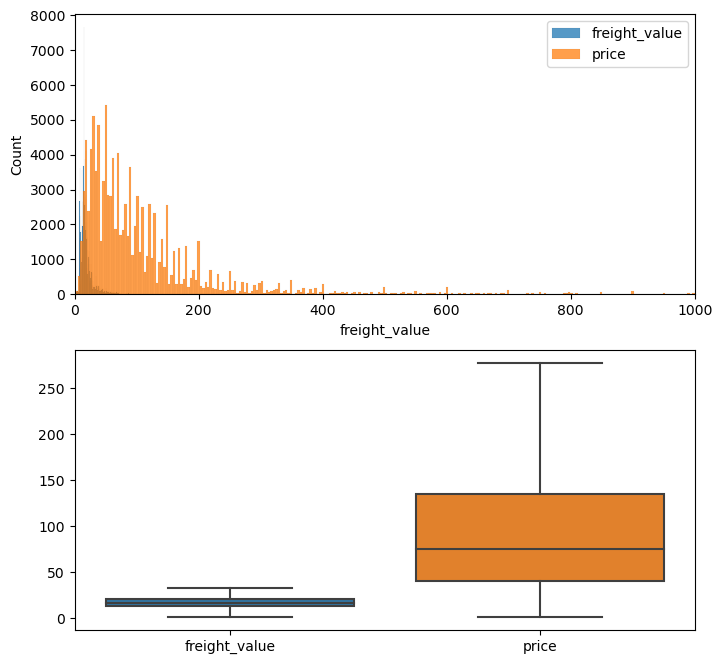

In [11]:
fig = plt.figure(1, figsize=(8, 8))

# Histogramme freight value et prix
plt.subplot(211)
sns.histplot(order_items["freight_value"], label="freight_value")
sns.histplot(order_items["price"], label="price")
plt.legend()
# x-axis limits
plt.xlim([0, 1000])

# Boxplot freight value et prix
plt.subplot(212)
sns.boxplot(data=order_items, order=["freight_value", "price"], showfliers=False)
plt.show()

#### olist_order_payments_dataset

**INFO**

Voici une explication des colonnes mentionnées :

1. `order_id`: C'est un identifiant unique associé à chaque commande. Chaque commande passée aura un order_id différent.

2. `payment_sequential`: Il s'agit d'un numéro séquentiel attribué à chaque transaction de paiement dans une commande donnée. Si une commande comporte plusieurs transactions de paiement, chaque transaction aura un numéro séquentiel différent. Cela permet de suivre l'ordre chronologique des paiements dans une commande.

3. `payment_type`: C'est le type de paiement utilisé pour une transaction donnée. Il peut s'agir de valeurs telles que "credit_card" (carte de crédit), "boleto" (bulletin de versement), "voucher" (bon d'achat), etc.

4. `payment_installments`: C'est le nombre d'installments (versements) utilisés pour le paiement. Certaines méthodes de paiement permettent de diviser le montant total en plusieurs versements.

5. `payment_value`: Il s'agit du montant total payé pour une transaction donnée. Ce montant peut inclure à la fois le montant principal de la commande et les frais supplémentaires tels que les frais d'expédition, les taxes, etc.

Ces colonnes sont souvent utilisées pour analyser les détails des transactions de paiement associées aux commandes, les différents modes de paiement utilisés par les clients, le montant total payé et d'autres informations liées aux paiements.

In [12]:
order_payments = pd.read_csv('Datasets//olist_order_payments_dataset.csv')

display(HTML("<b>Null values:</b>"))
display(order_payments.isnull().sum())

display(HTML("<br><br><b>INFO:</b>"))
display(order_payments.info())

display(HTML("<br><br><b>duplicated:</b>"))
display(order_payments.duplicated().sum())

display(HTML("<br><br><b>Describe:</b>"))
display(order_payments.describe(include='all'))

print('_'*110)

order_payments.head()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


None

0

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


______________________________________________________________________________________________________________


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Visualisation**

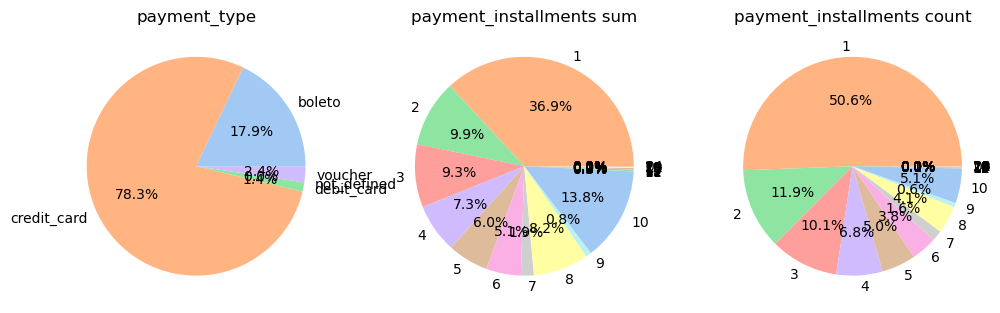

<Figure size 640x480 with 0 Axes>

In [13]:
# pieplot pour chaque type de paiement

plt.figure(figsize=(12, 6))  

# Figure 1
order_payments_group = order_payments.groupby('payment_type')['payment_value'].sum()
labels3 = order_payments_group.index
colors = sns.color_palette('pastel')

plt.subplot(1, 3, 1)  
plt.pie(order_payments_group, labels=labels3, colors=colors, autopct='%0.1f%%')
plt.title('payment_type')

# Figure 2 
order_payments_installments = order_payments.groupby('payment_installments')['payment_value'].sum()
labels4 = order_payments_installments.index

plt.subplot(1, 3, 2)  
plt.pie(order_payments_installments, labels=labels4, colors=colors, autopct='%0.1f%%')
plt.title('payment_installments sum')

plt.subplot(1, 3, 3)  
order_payments_installments_count = order_payments.groupby('payment_installments')['payment_value'].count()
order_payments_installments_count

labels5 = order_payments_installments_count.index
colors = sns.color_palette('pastel')
plt.pie(order_payments_installments_count, labels = labels5, colors = colors, autopct = '%0.1f%%')  
plt.title('payment_installments count')
plt.show()

plt.tight_layout()  # Ajuste automatiquement les espacements entre les sous-graphiques
plt.show()


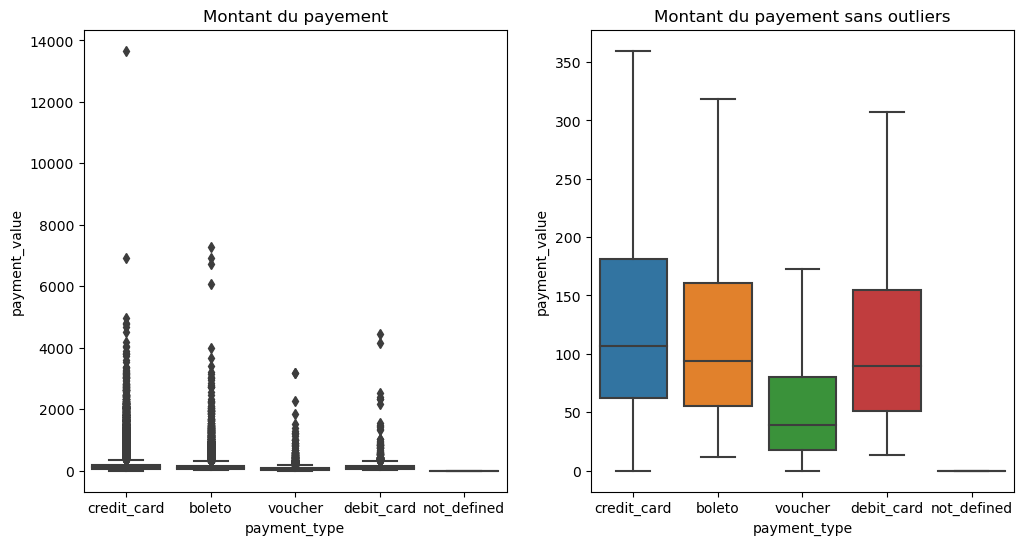

In [14]:
plt.figure(figsize=(12, 6))  

# Boxplot pour chaque type de paiement
plt.subplot(1, 2, 1)  
plt.title("Montant du payement")
sns.boxplot(data=order_payments, y="payment_value",
            x="payment_type", showfliers=True)

plt.subplot(1, 2, 2)  
plt.title("Montant du payement sans outliers")
sns.boxplot(data=order_payments, y="payment_value",
            x="payment_type", showfliers=False)
plt.show()

#### olist_order_reviews_dataset

**INFO**

In [15]:
order_reviews = pd.read_csv('Datasets//olist_order_reviews_dataset.csv')

display(HTML("<b>Null values:</b>"))
display(order_reviews.isnull().sum())

display(HTML("<br><br><b>INFO:</b>"))
display(order_reviews.info())

display(HTML("<br><br><b>duplicated:</b>"))
display(order_reviews.duplicated().sum())

display(HTML("<br><br><b>Describe:</b>"))
display(order_reviews.describe(include='all'))

print('_'*110)

order_reviews.head()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


None

0

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


______________________________________________________________________________________________________________


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


**Visualisation**

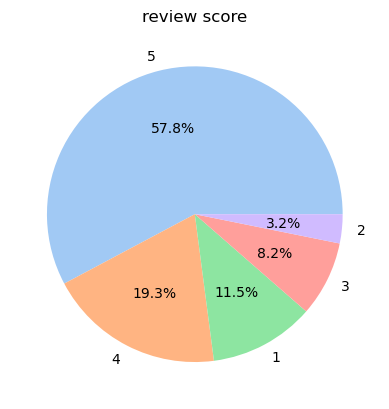

In [16]:
#Evaluation des produits
order_reviews_scor = order_reviews['review_score'].value_counts()
colors = sns.color_palette('pastel')
plt.pie(order_reviews_scor, labels = order_reviews_scor.index, colors = colors, autopct = '%0.1f%%');
plt.title('review score');

#### olist_orders_dataset

**INFO**

Voici une explication des colonnes mentionnées :

1. `order_status`: Cette colonne indique le statut de la commande, c'est-à-dire l'état actuel de la commande. Par exemple, le statut peut être "en cours de traitement", "expédiée", "livrée", "annulée", etc. Cette colonne permet de suivre l'évolution de l'état de la commande tout au long du processus.

2. `order_purchase_timestamp`: C'est la date et l'heure à laquelle la commande a été effectuée. Elle enregistre le moment exact où la commande a été passée par le client.

3. `order_approved_at`: Il s'agit de la date et de l'heure à laquelle la commande a été approuvée par le vendeur ou la plateforme de commerce électronique. Cette colonne enregistre le moment où la commande a été validée et acceptée pour traitement.

4. `order_delivered_carrier_date`: Cette colonne indique la date et l'heure à laquelle la commande a été remise au transporteur ou au service de livraison pour être acheminée vers le client. Cela marque le début du processus de livraison de la commande.

5. `order_delivered_customer_date`: C'est la date et l'heure à laquelle la commande a été livrée au client. Elle enregistre le moment où le client a reçu physiquement la commande.

6. `order_estimated_delivery_date`: Cette colonne représente la date prévue de livraison de la commande. Elle est généralement basée sur des estimations et peut être utilisée pour informer le client de la date à laquelle il peut s'attendre à recevoir sa commande.

Ces colonnes sont couramment utilisées dans le domaine de l'e-commerce pour suivre et analyser les commandes, les délais de livraison, les retards éventuels et d'autres informations liées au processus de commande et de livraison.

In [17]:
orders_dataset_all = pd.read_csv('Datasets//olist_orders_dataset.csv')

display(HTML("<b>Null values:</b>"))
display(orders_dataset_all.isnull().sum())

display(HTML("<br><br><b>INFO:</b>"))
display(orders_dataset_all.info())

display(HTML("<br><br><b>duplicated:</b>"))
display(orders_dataset_all.duplicated().sum())

display(HTML("<br><br><b>Describe:</b>"))
display(orders_dataset_all.describe(include='all'))

print('_'*110)

orders_dataset_all.head()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


None

0

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


______________________________________________________________________________________________________________


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [18]:
orders_dataset_all['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

Ces termes font référence à l'état d'une commande dans un système de gestion des commandes ou de commerce électronique. Voici une brève explication de chaque terme :

- 'delivered' : La commande a été livrée avec succès au client.
- 'invoiced' : Une facture a été générée pour la commande, mais la livraison n'a pas encore eu lieu.
- 'shipped' : La commande a été expédiée ou est en cours d'acheminement vers le client.
- 'processing' : La commande est en cours de traitement, ce qui peut inclure la préparation des articles, la vérification des stocks, etc.
- 'unavailable' : Les articles de la commande ne sont pas disponibles ou en rupture de stock.
- 'canceled' : La commande a été annulée avant d'être livrée.
- 'created' : La commande a été créée dans le système, mais n'a pas encore été traitée.
- 'approved' : La commande a été approuvée et est prête à être traitée.

Ces états permettent de suivre et de comprendre l'évolution d'une commande tout au long de son processus, depuis sa création jusqu'à sa livraison finale.

**Visualisation**

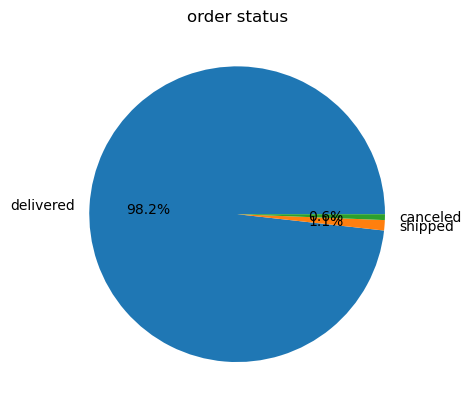

In [19]:
orders_dataset_status = orders_dataset_all['order_status'].value_counts().head(3)
plt.pie(orders_dataset_status, labels =orders_dataset_status.index, autopct = '%0.1f%%' )
plt.title('order status');

#### olist_products_dataset

**INFO**

In [20]:
products_dataset = pd.read_csv('Datasets//olist_products_dataset.csv')
products_dataset.columns = ['product_id', 'category_name', 'name_lenght', 'description_lenght', 
                            'photos_qty', 'weight_g', 'length_cm', 'height_cm', 'width_cm']
display(HTML("<b>Null values:</b>"))
display(products_dataset.isnull().sum())

display(HTML("<br><br><b>INFO:</b>"))
display(products_dataset.info())

display(HTML("<br><br><b>duplicated:</b>"))
display(products_dataset.duplicated().sum())

display(HTML("<br><br><b>Describe:</b>"))
display(products_dataset.describe(include='all'))

print('_'*110)

products_dataset.head()

product_id              0
category_name         610
name_lenght           610
description_lenght    610
photos_qty            610
weight_g                2
length_cm               2
height_cm               2
width_cm                2
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          32951 non-null  object 
 1   category_name       32341 non-null  object 
 2   name_lenght         32341 non-null  float64
 3   description_lenght  32341 non-null  float64
 4   photos_qty          32341 non-null  float64
 5   weight_g            32949 non-null  float64
 6   length_cm           32949 non-null  float64
 7   height_cm           32949 non-null  float64
 8   width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


None

0

,product_id,category_name,name_lenght,description_lenght,photos_qty,weight_g,length_cm,height_cm,width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


______________________________________________________________________________________________________________


,product_id,category_name,name_lenght,description_lenght,photos_qty,weight_g,length_cm,height_cm,width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Visualisation**

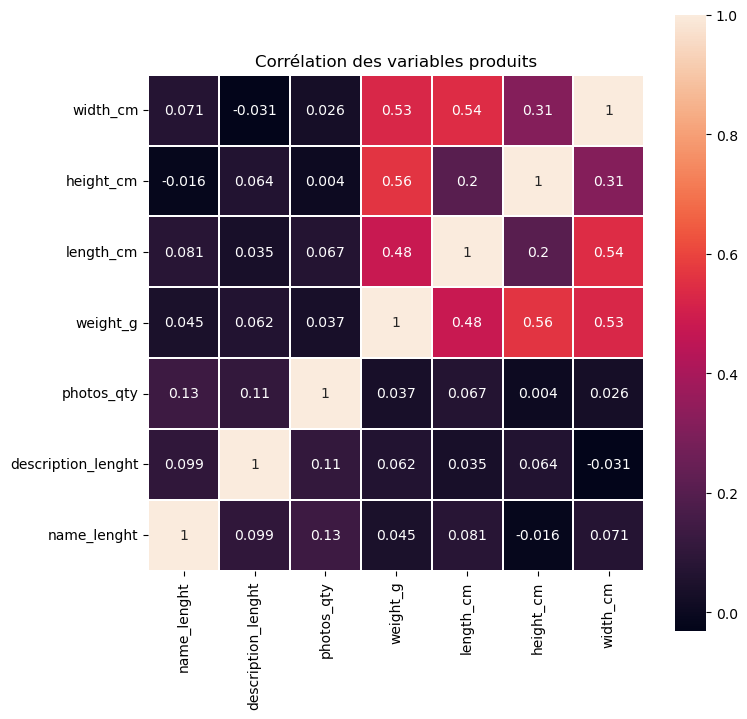

In [21]:
# Matrice de corrélation
matrix_corr = products_dataset.corr()
fig = plt.figure(1, figsize=(8, 8))
# Heatmap de la matrice de corrélation
sns.heatmap(matrix_corr, square=True, linewidths=0.1, annot=True)
plt.ylim(0, matrix_corr.shape[0])
plt.title("Corrélation des variables produits")
plt.show()

#### olist_sellers_dataset

**INFO**

In [22]:
sellers_dataset = pd.read_csv('Datasets//olist_sellers_dataset.csv')

display(HTML("<b>Null values:</b>"))
display(sellers_dataset.isnull().sum())

display(HTML("<br><br><b>INFO:</b>"))
display(sellers_dataset.info())

display(HTML("<br><br><b>duplicated:</b>"))
display(sellers_dataset.duplicated().sum())

display(HTML("<br><br><b>Describe:</b>"))
display(sellers_dataset.describe(include='all'))
print('_'*110)

sellers_dataset.head()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


None

0

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


______________________________________________________________________________________________________________


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Visualisation**

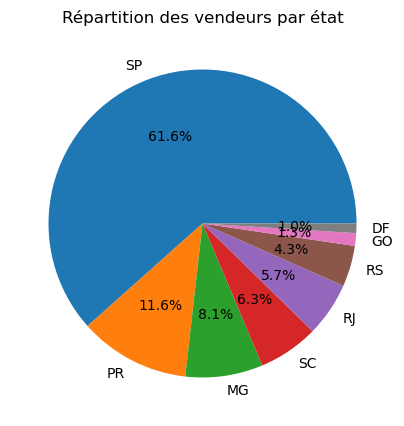

In [23]:
# Sélection des 11 premiers états les plus fréquents
sellers_dataset_state = sellers_dataset['seller_state'].value_counts().head(8)

# Création du pie plot
plt.figure(figsize=(5, 5))  # Définition de la taille de la figure (largeur, hauteur)
plt.pie(sellers_dataset_state, labels=sellers_dataset_state.index, autopct='%0.1f%%')
plt.title('Répartition des vendeurs par état')

plt.show()


## 2. preparation du jeu de donnees

### 2.1 Traitement du jeu de donnee (Feature engineering et sélection de features.)

**product_category_name_translation**

In [24]:
print(len(products_dataset.category_name.unique()))
products_dataset.category_name.unique()

74


array(['perfumaria', 'artes', 'esporte_lazer', 'bebes',
       'utilidades_domesticas', 'instrumentos_musicais', 'cool_stuff',
       'moveis_decoracao', 'eletrodomesticos', 'brinquedos',
       'cama_mesa_banho', 'construcao_ferramentas_seguranca',
       'informatica_acessorios', 'beleza_saude', 'malas_acessorios',
       'ferramentas_jardim', 'moveis_escritorio', 'automotivo',
       'eletronicos', 'fashion_calcados', 'telefonia', 'papelaria',
       'fashion_bolsas_e_acessorios', 'pcs', 'casa_construcao',
       'relogios_presentes', 'construcao_ferramentas_construcao',
       'pet_shop', 'eletroportateis', 'agro_industria_e_comercio', nan,
       'moveis_sala', 'sinalizacao_e_seguranca', 'climatizacao',
       'consoles_games', 'livros_interesse_geral',
       'construcao_ferramentas_ferramentas',
       'fashion_underwear_e_moda_praia', 'fashion_roupa_masculina',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'industria_comercio_e_negocios', 'telefonia_fixa',
   

In [25]:
print(len(product_category_name_translation.category_name.unique()))
product_category_name_translation.category_name.unique()

71


array(['beleza_saude', 'informatica_acessorios', 'automotivo',
       'cama_mesa_banho', 'moveis_decoracao', 'esporte_lazer',
       'perfumaria', 'utilidades_domesticas', 'telefonia',
       'relogios_presentes', 'alimentos_bebidas', 'bebes', 'papelaria',
       'tablets_impressao_imagem', 'brinquedos', 'telefonia_fixa',
       'ferramentas_jardim', 'fashion_bolsas_e_acessorios',
       'eletroportateis', 'consoles_games', 'audio', 'fashion_calcados',
       'cool_stuff', 'malas_acessorios', 'climatizacao',
       'construcao_ferramentas_construcao',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'construcao_ferramentas_jardim', 'fashion_roupa_masculina',
       'pet_shop', 'moveis_escritorio', 'market_place', 'eletronicos',
       'eletrodomesticos', 'artigos_de_festas', 'casa_conforto',
       'construcao_ferramentas_ferramentas', 'agro_industria_e_comercio',
       'moveis_colchao_e_estofado', 'livros_tecnicos', 'casa_construcao',
       'instrumentos_musicais', 'm

In [26]:
# Récupération des catégories uniques
products_categories = products_dataset.category_name.unique()
translation_categories = product_category_name_translation.category_name.unique()

# Recherche des valeurs manquantes
missing_categories = set(products_categories) - set(translation_categories)

# Affichage des valeurs manquantes
print("Catégories manquantes :")
for category in missing_categories:
    print(category)

Catégories manquantes :
nan
portateis_cozinha_e_preparadores_de_alimentos
pc_gamer


Ajout de lignes pour les traductions manquantes.

In [27]:
product_category_name_translation.columns

Index(['category_name', 'english_name'], dtype='object')

In [28]:
cols = product_category_name_translation.columns

df_app = pd.DataFrame({'category_name': ['pc_gamer', 'portateis_cozinha_e_preparadores_de_alimentos', np.nan],
                  'english_name': ['pc_gamer', 'kitchen_utensils', np.nan]})   

df_app

,category_name,english_name
0,pc_gamer,pc_gamer
1,portateis_cozinha_e_preparadores_de_alimentos,kitchen_utensils
2,NaN,NaN


In [29]:
product_category_name_translation = pd.concat([product_category_name_translation, df_app])
product_category_name_translation.reset_index(inplace = True)
product_category_name_translation.drop('index', axis = 1, inplace = True)


print(len(product_category_name_translation.english_name.unique()))


74


In [30]:
product_category_name_translation.english_name.unique()

array(['health_beauty', 'computers_accessories', 'auto', 'bed_bath_table',
       'furniture_decor', 'sports_leisure', 'perfumery', 'housewares',
       'telephony', 'watches_gifts', 'food_drink', 'baby', 'stationery',
       'tablets_printing_image', 'toys', 'fixed_telephony',
       'garden_tools', 'fashion_bags_accessories', 'small_appliances',
       'consoles_games', 'audio', 'fashion_shoes', 'cool_stuff',
       'luggage_accessories', 'air_conditioning',
       'construction_tools_construction',
       'kitchen_dining_laundry_garden_furniture',
       'costruction_tools_garden', 'fashion_male_clothing', 'pet_shop',
       'office_furniture', 'market_place', 'electronics',
       'home_appliances', 'party_supplies', 'home_confort',
       'costruction_tools_tools', 'agro_industry_and_commerce',
       'furniture_mattress_and_upholstery', 'books_technical',
       'home_construction', 'musical_instruments',
       'furniture_living_room', 'construction_tools_lights',
       'indust

In [31]:
# # Dictionary of the keywords in categories related to bigger categories
# big_cat_dict = {
#                 'cat_electronics' : ['telephony', 'watches', 'consoles',
#                                      'computer', 'tablets', 'appliance',
#                                      'electronics'],
#                 'cat_furniture' : ['furniture', 'table', 'bed'],
#                 'cat_food' : ['food', 'drink', 'cuisine'],
#                 'cat_home' : ['home', 'house', 'kitchen', 'flowers', 'bed',
#                               'decor', 'conditioning', 'party', 'christmas',
#                               'luggage'],
#                 'cat_diy' : ['struction', 'tools', 'craft'],
#                 'cat_fashion' : ['fash'],
#                 'cat_leisure' : ['garden', 'toys', 'game', 'cool', 'games',
#                                  'art', 'sports', 'music', 'cine', 'beach',
#                                  'pc'],
#                 'cat_multimedia' : ['dvd', 'audio'],
#                 'cat_books' : ['books'],
#                 'cat_hygiene' : ['health', 'perfumery', 'baby', 'hygiene' ],
#                 'cat_office' : ['office', 'stationery', 'business'],
#                 'cat_miscellaneous' :  ['appliances', 'security', 'auto',
#                                         'pet', 'market', 'industry'],
#                 'cat_unknown': ['unknown']
#                 }

# # Create new dummy columns for bigger categories
# for big_cat, li_words in big_cat_dict.items():
#     product_category_name_translation[big_cat] = product_category_name_translation.iloc[:,1]\
#         .str.contains('|'.join(li_words), regex=True).map({False: 0, True: 1})
    
# #product_category_name_translation.rename(columns = {'category_name':'bres_name', 'english_name':'category_name'}, inplace = True)  
# product_category_name_translation.sample(5)

In [32]:
categories = {
    #appliances : electroménager
    'home_appliances' :'appliances',
    'home_appliances_2' : 'appliances',
    'small_appliances_kitchen_and_food_processors' : 'appliances',
    'small_appliances_home_oven_and_coffee' : 'appliances',
    'small_appliances': 'appliances',
    'air_conditioning' : 'appliances',
    
    #tools : outils
    'garden_tools': 'tools',
    'costruction_tools_garden' : 'tools',
    'home_construction' : 'tools',
    'costruction_tools_tools' : 'tools',
    'construction_tools_lights' : 'tools',
    'construction_tools_construction' : 'tools', 
    'construction_tools_safety' : 'tools', 
    
    #electronique
    'electronics' : 'electronics',
    'computers_accessories': 'electronics',
    'telephony' : 'electronics',
    'consoles_games' : 'electronics',
    'computers' : 'electronics',
    'pc_gamer' : 'electronics',
    'fixed_telephony' : 'electronics',
    'tablets_printing_image' : 'electronics',
    
    #hygiene et beauté
    'health_beauty' : 'hygiene_and_beauty',
    'perfumery' : 'hygiene_and_beauty',
    'diapers_and_hygiene': 'hygiene_and_beauty', 
  
    #loisirs et auto
    'sports_leisure' : 'auto_leisure', 
    'toys': 'auto_leisure',
     'auto': 'auto_leisure',
    
    #fashion
    'watches_gifts' : 'fashion',  
    'fashion_bags_accessories' : 'fashion',
    'fashion_shoes': 'fashion',
    'fashion_male_clothing' : 'fashion',
    'fashio_female_clothing' : 'fashion',
    'fashion_childrens_clothes' : 'fashion',
    'fashion_underwear_beach' : 'fashion',
    'fashion_sport' : 'fashion',
    'baby' : 'fashion',
    'luggage_accessories' : 'fashion', 
     
    #mobilier
    'kitchen_dining_laundry_garden_furniture' : 'furniture',
    'furniture_living_room' : 'furniture', 
    'furniture_mattress_and_upholstery' : 'furniture',
    'office_furniture' : 'furniture',
    'furniture_bedroom' : 'furniture',
    
    #articles de décoration
    'furniture_decor': 'decoration' ,
    'christmas_supplies': 'decoration',
    'party_supplies': 'decoration',
    'bed_bath_table' : 'decoration',
   
    #articles ménagers
    'housewares': 'housewares',
    'home_confort' : 'housewares',
    'home_comfort_2' : 'housewares',
    'la_cuisine': 'housewares',
    'stationery': 'housewares',
       
    #jardin et extérieurs
    'pet_shop': 'garden_outdoors',
    'flowers': 'garden_outdoors', 
    'signaling_and_security' : 'garden_outdoors' ,
    #services
    'market_place' : 'service',   
    'industry_commerce_and_business' : 'services',
    'security_and_services' : 'services', 
    
    #culture 
    'arts_and_craftmanship' : 'culture',   
    'books_technical': 'culture',
    'books_general_interest': 'culture',
    'books_imported': 'culture',
    'musical_instruments' : 'culture',
    'cds_dvds_musicals' : 'culture',
    'dvds_blu_ray' : 'culture',
    'cine_photo' : 'culture',
    'audio' : 'culture',
    'music' : 'culture',
    'art' : 'culture', 
    
    #aliments et boissons
    'food': 'food_drinks',
    'food_drink' : 'food_drinks',
    'drinks': 'food_drinks',
    'agro_industry_and_commerce' : 'food_drinks',
    
    #autres
    'cool_stuff': "other",
    'unknown' : "other", 
}

In [33]:
#products_en['product_category_name'] = products_en['product_category_name_english'].astype('object')
product_category_name_translation['product_category_name'] = product_category_name_translation ['english_name'].replace(categories, regex=False)

In [34]:
product_category_name_translation['product_category_name'].isna().sum()

1

In [35]:
product_category_name_translation[product_category_name_translation['product_category_name'].isna()]

,category_name,english_name,product_category_name
73,NaN,NaN,NaN


In [36]:
print(product_category_name_translation['product_category_name'].nunique())
product_category_name_translation.head()

16


,category_name,english_name,product_category_name
0,beleza_saude,health_beauty,hygiene_and_beauty
1,informatica_acessorios,computers_accessories,electronics
2,automotivo,auto,auto_leisure
3,cama_mesa_banho,bed_bath_table,decoration
4,moveis_decoracao,furniture_decor,decoration


**Products / Items**

In [37]:
#cat_dict = product_category_name_translation.set_index('bres_name').to_dict()['category_name']

In [38]:
#products_dataset.category_name = products_dataset.category_name.map(cat_dict)

In [39]:
# Afficher le DataFrame avec les valeurs manquantes remplacées
print(products_dataset.isna().sum())
products_dataset.head(5)

product_id              0
category_name         610
name_lenght           610
description_lenght    610
photos_qty            610
weight_g                2
length_cm               2
height_cm               2
width_cm                2
dtype: int64


,product_id,category_name,name_lenght,description_lenght,photos_qty,weight_g,length_cm,height_cm,width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [40]:
from sklearn.impute import KNNImputer

# Instancier le KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Remplacer les valeurs manquantes
products_dataset[["weight_g", "length_cm", "height_cm", "width_cm"]] = imputer.fit_transform(products_dataset[["weight_g", "length_cm", "height_cm", "width_cm"]])

# Afficher le DataFrame avec les valeurs manquantes remplacées
print(products_dataset.isna().sum())
products_dataset

product_id              0
category_name         610
name_lenght           610
description_lenght    610
photos_qty            610
weight_g                0
length_cm               0
height_cm               0
width_cm                0
dtype: int64


,product_id,category_name,name_lenght,description_lenght,photos_qty,weight_g,length_cm,height_cm,width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [41]:
from sklearn.preprocessing import LabelEncoder
# Appliquer l'encodage des étiquettes
label_encoder = LabelEncoder()

# Remplacer les valeurs NaN par une valeur temporaire
temp_value = "temp_value"
products_dataset["category_name"] = products_dataset["category_name"].fillna(temp_value)

# Encoder les étiquettes
products_dataset["category_label"] = label_encoder.fit_transform(products_dataset["category_name"])

# Restaurer les valeurs NaN dans la colonne category_label
products_dataset.loc[products_dataset["category_name"] == temp_value, "category_label"] = np.nan
products_dataset.loc[products_dataset["category_name"] == temp_value, "category_name"] = np.nan

# Afficher le DataFrame avec les étiquettes encodées
print(products_dataset.isna().sum())
products_dataset

product_id              0
category_name         610
name_lenght           610
description_lenght    610
photos_qty            610
weight_g                0
length_cm               0
height_cm               0
width_cm                0
category_label        610
dtype: int64


,product_id,category_name,name_lenght,description_lenght,photos_qty,weight_g,length_cm,height_cm,width_cm,category_label
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,62.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,3.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,32.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,9.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,73.0
...,...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,54.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,23.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,13.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,44.0


In [42]:
print(len(products_dataset.category_name.unique()))
print(len(products_dataset.category_name.isna()))

products_dataset.category_name.unique()

74
32951


array(['perfumaria', 'artes', 'esporte_lazer', 'bebes',
       'utilidades_domesticas', 'instrumentos_musicais', 'cool_stuff',
       'moveis_decoracao', 'eletrodomesticos', 'brinquedos',
       'cama_mesa_banho', 'construcao_ferramentas_seguranca',
       'informatica_acessorios', 'beleza_saude', 'malas_acessorios',
       'ferramentas_jardim', 'moveis_escritorio', 'automotivo',
       'eletronicos', 'fashion_calcados', 'telefonia', 'papelaria',
       'fashion_bolsas_e_acessorios', 'pcs', 'casa_construcao',
       'relogios_presentes', 'construcao_ferramentas_construcao',
       'pet_shop', 'eletroportateis', 'agro_industria_e_comercio', nan,
       'moveis_sala', 'sinalizacao_e_seguranca', 'climatizacao',
       'consoles_games', 'livros_interesse_geral',
       'construcao_ferramentas_ferramentas',
       'fashion_underwear_e_moda_praia', 'fashion_roupa_masculina',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'industria_comercio_e_negocios', 'telefonia_fixa',
   

In [43]:
print(len(products_dataset.category_label.unique()))
print(len(products_dataset.category_label.isna()))

products_dataset.category_label.unique()

74
32951


array([62.,  3., 32.,  9., 73., 45., 26., 54., 28., 12., 13., 25., 44.,
       11., 50., 40., 55.,  8., 30., 34., 70., 59., 33., 61., 16., 66.,
       21., 63., 31.,  0., nan, 57., 68., 19., 20., 48., 22., 39., 38.,
       53., 43., 71., 23., 49., 29.,  5., 10., 51., 46., 24., 36., 14.,
        7.,  2., 58.,  1., 69., 47., 64., 35.,  6., 37., 27.,  4., 60.,
       56., 18., 42., 41., 15., 65., 67., 52., 17.])

In [44]:
keys = list(products_dataset.category_label.unique())
values = list(products_dataset.category_name.unique())

dictionary = dict(zip(keys, values))
print(dictionary)

{62.0: 'perfumaria', 3.0: 'artes', 32.0: 'esporte_lazer', 9.0: 'bebes', 73.0: 'utilidades_domesticas', 45.0: 'instrumentos_musicais', 26.0: 'cool_stuff', 54.0: 'moveis_decoracao', 28.0: 'eletrodomesticos', 12.0: 'brinquedos', 13.0: 'cama_mesa_banho', 25.0: 'construcao_ferramentas_seguranca', 44.0: 'informatica_acessorios', 11.0: 'beleza_saude', 50.0: 'malas_acessorios', 40.0: 'ferramentas_jardim', 55.0: 'moveis_escritorio', 8.0: 'automotivo', 30.0: 'eletronicos', 34.0: 'fashion_calcados', 70.0: 'telefonia', 59.0: 'papelaria', 33.0: 'fashion_bolsas_e_acessorios', 61.0: 'pcs', 16.0: 'casa_construcao', 66.0: 'relogios_presentes', 21.0: 'construcao_ferramentas_construcao', 63.0: 'pet_shop', 31.0: 'eletroportateis', 0.0: 'agro_industria_e_comercio', nan: nan, 57.0: 'moveis_sala', 68.0: 'sinalizacao_e_seguranca', 19.0: 'climatizacao', 20.0: 'consoles_games', 48.0: 'livros_interesse_geral', 22.0: 'construcao_ferramentas_ferramentas', 39.0: 'fashion_underwear_e_moda_praia', 38.0: 'fashion_roup

In [45]:
from sklearn.impute import KNNImputer

# Instancier le KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Remplacer les valeurs manquantes
products_dataset[["weight_g", "length_cm", "height_cm", "width_cm", "category_label"]] = imputer.fit_transform(products_dataset[["weight_g", "length_cm", "height_cm", "width_cm", "category_label"]])

# Afficher le DataFrame avec les valeurs manquantes remplacées
print(products_dataset.isna().sum())

product_id              0
category_name         610
name_lenght           610
description_lenght    610
photos_qty            610
weight_g                0
length_cm               0
height_cm               0
width_cm                0
category_label          0
dtype: int64


In [46]:
products_dataset.head()

,product_id,category_name,name_lenght,description_lenght,photos_qty,weight_g,length_cm,height_cm,width_cm,category_label
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,62.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,3.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,32.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,9.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,73.0


In [47]:
# Appliquer le dictionnaire sur la colonne "category_label"
products_dataset["category_label"] = products_dataset["category_label"].map(dictionary)

# Afficher le DataFrame mis à jour
products_dataset.head(10)

,product_id,category_name,name_lenght,description_lenght,photos_qty,weight_g,length_cm,height_cm,width_cm,category_label
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,utilidades_domesticas
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0,instrumentos_musicais
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0,cool_stuff
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0,moveis_decoracao
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0,eletrodomesticos
9,8c92109888e8cdf9d66dc7e463025574,brinquedos,36.0,1156.0,1.0,600.0,17.0,10.0,12.0,brinquedos


In [48]:
print(products_dataset.isna().sum())

product_id              0
category_name         610
name_lenght           610
description_lenght    610
photos_qty            610
weight_g                0
length_cm               0
height_cm               0
width_cm                0
category_label        502
dtype: int64


In [49]:
products_dataset.drop('category_name', axis = 1, inplace = True)
products_dataset.drop(['name_lenght', 'description_lenght', 'photos_qty'], axis = 1, inplace = True)
products_dataset.rename(columns = {'category_label' : 'category_name'}, inplace = True)

In [50]:
print(products_dataset.isna().sum())

product_id         0
weight_g           0
length_cm          0
height_cm          0
width_cm           0
category_name    502
dtype: int64


In [51]:
products_dataset['product_volume_cm3'] =\
    products_dataset.length_cm *\
    products_dataset.height_cm *\
    products_dataset.width_cm

In [52]:
products_dataset.head()

,product_id,weight_g,length_cm,height_cm,width_cm,category_name,product_volume_cm3
0,1e9e8ef04dbcff4541ed26657ea517e5,225.0,16.0,10.0,14.0,perfumaria,2240.0
1,3aa071139cb16b67ca9e5dea641aaa2f,1000.0,30.0,18.0,20.0,artes,10800.0
2,96bd76ec8810374ed1b65e291975717f,154.0,18.0,9.0,15.0,esporte_lazer,2430.0
3,cef67bcfe19066a932b7673e239eb23d,371.0,26.0,4.0,26.0,bebes,2704.0
4,9dc1a7de274444849c219cff195d0b71,625.0,20.0,17.0,13.0,utilidades_domesticas,4420.0


In [53]:
products_dataset.drop(['length_cm', 'height_cm', 'width_cm'], axis = 1, inplace = True)
products_dataset.head(3)

,product_id,weight_g,category_name,product_volume_cm3
0,1e9e8ef04dbcff4541ed26657ea517e5,225.0,perfumaria,2240.0
1,3aa071139cb16b67ca9e5dea641aaa2f,1000.0,artes,10800.0
2,96bd76ec8810374ed1b65e291975717f,154.0,esporte_lazer,2430.0


**orders_dataset**

In [54]:
orders_dataset = orders_dataset_all.copy()

In [55]:
orders_dataset_all['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [56]:
orders_dataset_canceled = orders_dataset_all[orders_dataset_all['order_status'] == 'canceled']
orders_dataset_canceled.head(3).T

,397,613,1058
order_id,1b9ecfe83cdc259250e1a8aca174f0ad,714fb133a6730ab81fa1d3c1b2007291,3a129877493c8189c59c60eb71d97c29
customer_id,6d6b50b66d79f80827b6d96751528d30,e3fe72696c4713d64d3c10afe71e75ed,0913cdce793684e52bbfac69d87e91fd
order_status,canceled,canceled,canceled
order_purchase_timestamp,2018-08-04 14:29:27,2018-01-26 21:34:08,2018-01-25 13:34:24
order_approved_at,2018-08-07 04:10:26,2018-01-26 21:58:39,2018-01-25 13:50:20
order_delivered_carrier_date,NaN,2018-01-29 22:33:25,2018-01-26 21:42:18
order_delivered_customer_date,NaN,NaN,NaN
order_estimated_delivery_date,2018-08-14 00:00:00,2018-02-22 00:00:00,2018-02-23 00:00:00


In [57]:
orders_dataset = orders_dataset[orders_dataset['order_status'] == 'delivered']
orders_dataset['order_status'].unique()

array(['delivered'], dtype=object)

In [58]:
# Conversion des données dates en datetime
orders_dataset['order_purchase_timestamp'] = pd.to_datetime(orders_dataset['order_purchase_timestamp'])
orders_dataset['order_approved_at'] = pd.to_datetime(orders_dataset['order_approved_at'])
orders_dataset['order_delivered_carrier_date'] = pd.to_datetime(orders_dataset['order_delivered_carrier_date'])
orders_dataset['order_delivered_customer_date'] = pd.to_datetime(orders_dataset['order_delivered_customer_date'])
orders_dataset['order_estimated_delivery_date'] = pd.to_datetime(orders_dataset['order_estimated_delivery_date'])
orders_dataset_vis = orders_dataset.copy()

# Calculer les différences en heures

#Retard dans l'acceptation du vendeur en heures
orders_dataset['vendeur_accepte(H)'] = (orders_dataset['order_approved_at'] - orders_dataset['order_purchase_timestamp']) 
orders_dataset['vendeur_accepte(H)'] = orders_dataset['vendeur_accepte(H)'].dt.total_seconds() / 3600

#Retard dans l'envoi de la commande par le vendeur en heures
orders_dataset['send_time(H)'] = (orders_dataset['order_delivered_carrier_date'] - orders_dataset['order_purchase_timestamp'])
orders_dataset['send_time(H)'] = orders_dataset['send_time(H)'].dt.total_seconds() / 3600

#Délai de livraison
orders_dataset['delivery_time(H)'] = (orders_dataset['order_delivered_customer_date'] - orders_dataset['order_delivered_carrier_date']) 
orders_dataset['delivery_time(H)'] = orders_dataset['delivery_time(H)'].dt.total_seconds() / 3600

#Différence entre le temps estimé et le temps réel
orders_dataset['diff_estim_real(H)'] = (orders_dataset['order_delivered_customer_date'] - orders_dataset['order_estimated_delivery_date'])
orders_dataset['diff_estim_real(H)'] = orders_dataset['diff_estim_real(H)'].dt.total_seconds() / 3600

#Le temps total pour recevoir
orders_dataset['time_total_receive(H)'] = (orders_dataset['order_delivered_customer_date'] - orders_dataset['order_purchase_timestamp']) 
orders_dataset['time_total_receive(H)'] = orders_dataset['time_total_receive(H)'].dt.total_seconds() / 3600

#changer pour second la colonne order_purchase_timestamp
# Choisir une date de référence arbitraire
# Créer un objet pd.Timedelta qui représente un jour
one_day = pd.Timedelta(days=1)

# Ajouter un jour à la valeur maximale de la colonne order_purchase_timestamp
# Choisir une date de référence arbitraire
ref_date = orders_dataset['order_purchase_timestamp'].max() + one_day

orders_dataset['order_recently(H)'] = (ref_date - orders_dataset['order_purchase_timestamp']).dt.total_seconds() / 3600 



In [59]:
print('order_purchase_timestamp')
print(orders_dataset['order_purchase_timestamp'].min())
print(orders_dataset['order_purchase_timestamp'].max())
print('_'*30)
print('order_delivered_carrier_date')
print(orders_dataset['order_delivered_carrier_date'].min())
print(orders_dataset['order_delivered_carrier_date'].max())
print('_'*30)
print('order_delivered_customer_date')
print(orders_dataset['order_delivered_customer_date'].min())
print(orders_dataset['order_delivered_customer_date'].max())

order_purchase_timestamp
2016-09-15 12:16:38
2018-08-29 15:00:37
______________________________
order_delivered_carrier_date
2016-10-08 10:34:01
2018-09-11 19:48:28
______________________________
order_delivered_customer_date
2016-10-11 13:46:32
2018-10-17 13:22:46


In [60]:
#Supprimer les colonnes inutiles

orders_dataset.drop([ 'order_approved_at', 'order_delivered_carrier_date',
                     'order_delivered_customer_date', 'order_estimated_delivery_date'], axis = 1, inplace = True) #'order_purchase_timestamp',

In [61]:
orders_dataset.head().T

,0,1,2,3,4
order_id,e481f51cbdc54678b7cc49136f2d6af7,53cdb2fc8bc7dce0b6741e2150273451,47770eb9100c2d0c44946d9cf07ec65d,949d5b44dbf5de918fe9c16f97b45f8a,ad21c59c0840e6cb83a9ceb5573f8159
customer_id,9ef432eb6251297304e76186b10a928d,b0830fb4747a6c6d20dea0b8c802d7ef,41ce2a54c0b03bf3443c3d931a367089,f88197465ea7920adcdbec7375364d82,8ab97904e6daea8866dbdbc4fb7aad2c
order_status,delivered,delivered,delivered,delivered,delivered
order_purchase_timestamp,2017-10-02 10:56:33,2018-07-24 20:41:37,2018-08-08 08:38:49,2017-11-18 19:28:06,2018-02-13 21:18:39
vendeur_accepte(H),0.178333,30.713889,0.276111,0.298056,1.030556
send_time(H),56.974167,41.823056,5.186389,90.198056,22.465278
delivery_time(H),145.503611,288.945833,220.274722,226.811944,46.507778
diff_estim_real(H),-170.579722,-128.5375,-413.891944,-311.521667,-221.716111
time_total_receive(H),202.477778,330.768889,225.461111,317.01,68.973056
order_recently(H),7972.067778,882.316667,534.363333,6835.541944,4745.699444


In [62]:
orders_dataset.describe() / 24 #jour

,vendeur_accepte(H),send_time(H),delivery_time(H),diff_estim_real(H),time_total_receive(H),order_recently(H)
count,4019.333333,4019.833333,4019.541667,4019.583333,4019.583333,4019.916667
mean,0.428199,3.227504,9.330297,-11.178126,12.558217,240.646586
std,0.855642,3.597594,8.759924,10.184354,9.546156,152.838560
min,0.000000,-171.212419,-16.096169,-146.016123,0.533414,1.000000
25%,0.008970,1.127095,4.100046,-16.244065,6.766204,116.837384
50%,0.014306,2.201470,7.099769,-11.948102,10.217477,221.801991
75%,0.604774,4.067645,12.028646,-6.389815,15.720182,350.250159
max,30.893484,125.775521,205.190972,188.975081,209.628611,714.113877


In [63]:
orders_dataset['vendeur_accepte(H)'].sort_values().dropna()

92125      0.000000
50694      0.000000
50767      0.000000
23642      0.000000
3029       0.000000
            ...    
73881    319.532778
71651    404.228889
88671    554.785000
55708    738.448889
96251    741.443611
Name: vendeur_accepte(H), Length: 96464, dtype: float64

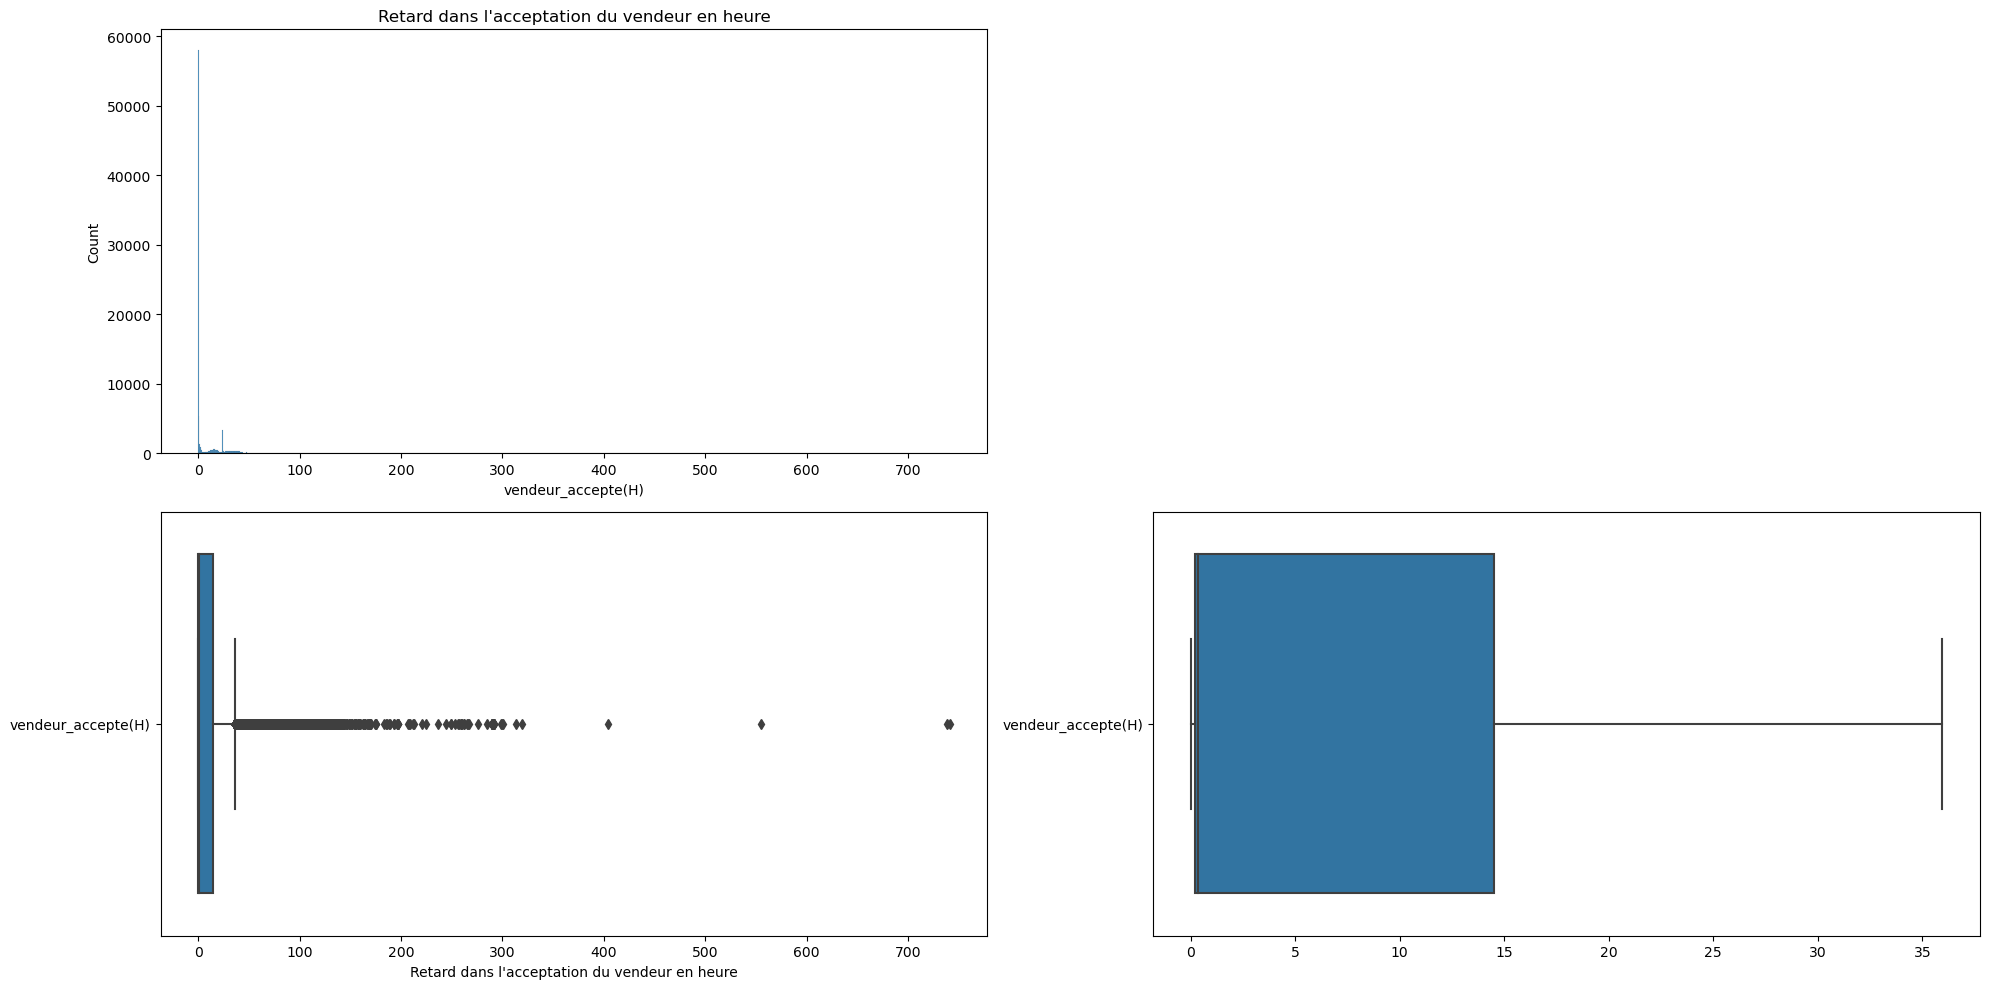

In [64]:
# Retard dans l'acceptation du vendeur en second 
plt.figure(figsize=(20, 10))

# Première figure (première ligne et colonne)
plt.subplot(221)
plt.title("Retard dans l'acceptation du vendeur en heure")
sns.histplot((orders_dataset['vendeur_accepte(H)'].dropna()))

# Deuxième figure (deuxième ligne et première colonne)
# plt.figure(figsize=(8, 8))

plt.subplot(223)
sns.boxplot(data=orders_dataset, order=["vendeur_accepte(H)"], showfliers=True, orient='h')
plt.xlabel('Retard dans l\'acceptation du vendeur en heure')

# Troisième figure (deuxième ligne et deuxième colonne)
plt.subplot(224)
sns.boxplot(data=orders_dataset, order=["vendeur_accepte(H)"], showfliers=False, orient='h')

plt.tight_layout()
plt.show()

In [65]:
#orders_dataset[orders_dataset['vendeur_accepte(H)'] > 200]

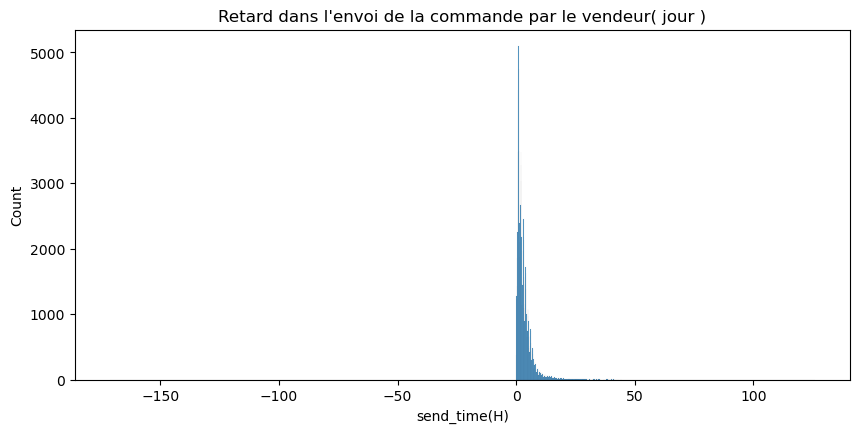

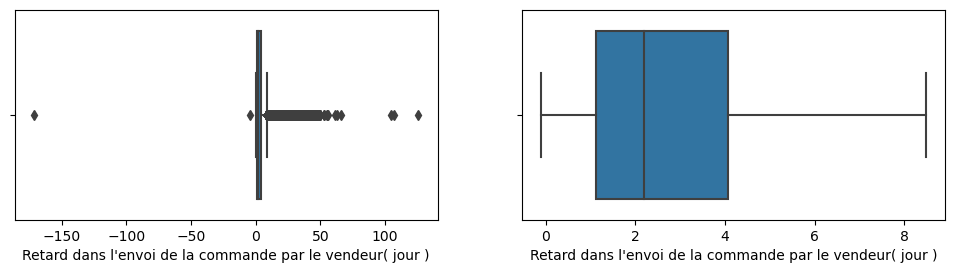

In [66]:
# Retard dans l'envoi de la commande par le vendeur en jour
plt.figure(figsize=(22, 10))

plt.subplot(221)
plt.title("Retard dans l'envoi de la commande par le vendeur( jour )")
sns.histplot((orders_dataset['send_time(H)'] / 24).dropna())

plt.figure(figsize=(12, 6))
plt.subplot(223)
sns.boxplot(data=orders_dataset, x=orders_dataset['send_time(H)'] / 24, showfliers=True, orient='h')
plt.xlabel("Retard dans l'envoi de la commande par le vendeur( jour )")

plt.subplot(224)
sns.boxplot(data=orders_dataset, x=orders_dataset['send_time(H)'] / 24, showfliers=False, orient='h')
plt.xlabel("Retard dans l'envoi de la commande par le vendeur( jour )")

plt.show()

In [67]:
#Valeurs aberrantes de send_time(s)'
orders_dataset[orders_dataset['send_time(H)'] < 0]

,order_id,customer_id,order_status,order_purchase_timestamp,vendeur_accepte(H),send_time(H),delivery_time(H),diff_estim_real(H),time_total_receive(H),order_recently(H)
615,b9afddbdcfadc9a87b41a83271c3e888,85c6af75161b8b2b1af98e82b5a6a5a5,delivered,2018-08-16 13:50:48,0.240278,-0.396667,193.526944,-249.023056,193.130278,337.163611
1111,ad133696906f6a78826daa0911b7daec,e6f5b234bb0d847f10eebd70130c5d49,delivered,2018-06-15 15:41:22,0.633611,-0.822778,171.293611,-605.839722,170.470833,1823.320833
1329,74e033208dc13a7b8127eb8e73d09b76,72fcbb1145f2889eddcba6d6c1d6c090,delivered,2018-05-02 10:48:44,0.416944,-0.995556,133.293333,-504.890000,132.297778,2884.198056
1372,a6b58794fd2ba533359a76c08df576e3,ccd8e3459ad58ae538c9d2cf35532ba4,delivered,2018-05-14 15:18:23,0.253333,-1.539722,125.792222,-460.441111,124.252500,2591.703889
1864,5792e0b1c8c8a2bf53af468c9a422c88,5c427f06e7fcf902e309743516e2c580,delivered,2018-07-26 13:25:14,0.166667,-0.720556,98.050556,-225.249444,97.330000,841.589722
...,...,...,...,...,...,...,...,...,...,...
98172,f7780ea2807db31691e83f0013294035,3088cc4bfafe311f1d84830808c2aa6d,delivered,2018-07-30 15:22:15,0.216944,-0.370833,75.541667,18.541667,75.170833,743.639444
98430,d7646ffe8fdd9e7d9557f9f7cbf04530,f896e70d84f6db9a56b86a47dd8718f0,delivered,2018-05-04 14:50:37,0.329167,-0.043611,100.311667,-172.888333,100.268056,2832.166667
98672,5ded8a3706eabd813685534724f066de,460316e38d4d241fc79d4f6729f8f7f6,delivered,2018-07-18 08:46:52,0.248889,-0.047778,173.154722,-370.111944,173.106944,1038.229167
98780,d10046876c7d9f01613da59ffa6cb07f,6559cb5b365f173915f766fefcd86972,delivered,2018-07-18 16:14:16,0.183611,-0.671111,125.212222,-339.221111,124.541111,1030.772500


In [68]:
#Remplissage des valeurs aberrantes avec la médiane de la colonne
send_median = orders_dataset[orders_dataset['send_time(H)'] >= 0]['send_time(H)'].median()
orders_dataset.loc[orders_dataset['send_time(H)'] < 0 , 'send_time(H)' ] = send_median
orders_dataset[orders_dataset['send_time(H)'] < 0]

,order_id,customer_id,order_status,order_purchase_timestamp,vendeur_accepte(H),send_time(H),delivery_time(H),diff_estim_real(H),time_total_receive(H),order_recently(H)


Text(0.5, 0, "Retard dans l'envoi de la commande par le vendeur( jour )")

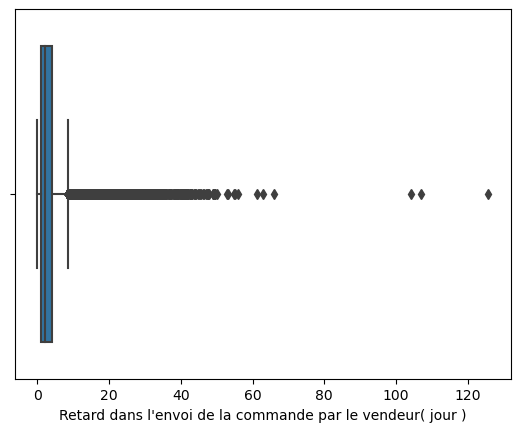

In [69]:
sns.boxplot(data=orders_dataset, x=orders_dataset['send_time(H)'] / 24, showfliers=True, orient='h')
plt.xlabel("Retard dans l'envoi de la commande par le vendeur( jour )")

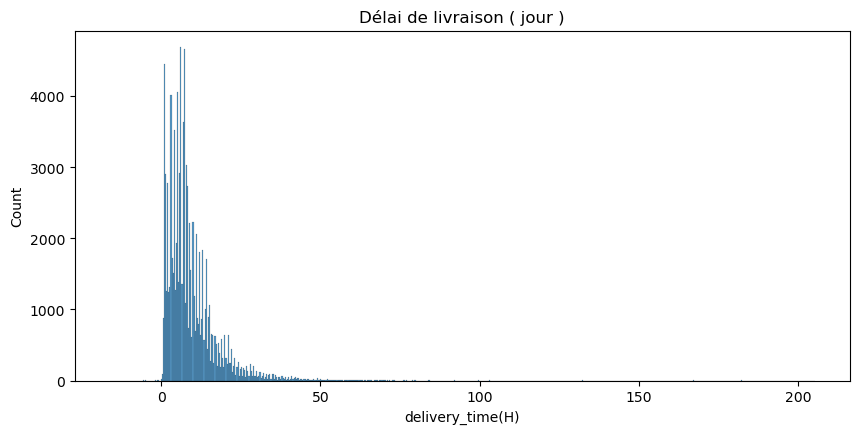

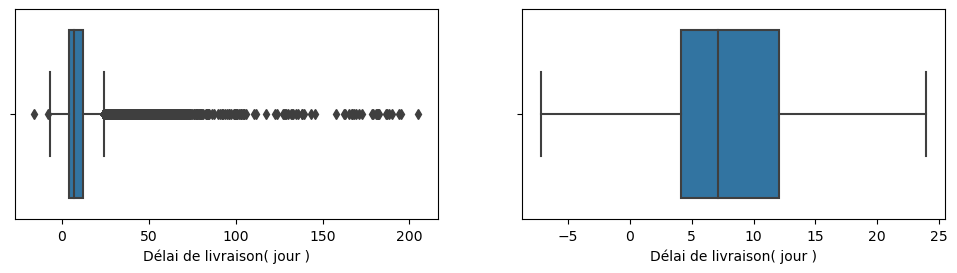

In [70]:
# Délai de livraison en jour 
plt.figure(figsize=(22, 10))

plt.subplot(221)
plt.title("Délai de livraison ( jour )")
sns.histplot((orders_dataset['delivery_time(H)']/24).dropna())

plt.figure(figsize=(12, 6))
plt.subplot(223)
sns.boxplot(data=orders_dataset, x=orders_dataset['delivery_time(H)'] / 24, showfliers=True, orient='h')
plt.xlabel("Délai de livraison( jour )")

plt.subplot(224)
sns.boxplot(data=orders_dataset, x=orders_dataset['delivery_time(H)'] / 24, showfliers=False, orient='h')
plt.xlabel("Délai de livraison( jour )")

plt.show()

In [71]:
#Valeurs aberrantes de delivery_time(s)
orders_dataset[orders_dataset['delivery_time(H)'] < 0].head()

,order_id,customer_id,order_status,order_purchase_timestamp,vendeur_accepte(H),send_time(H),delivery_time(H),diff_estim_real(H),time_total_receive(H),order_recently(H)
6437,a1abeb653a4d4cd1e142ccb8c82cd069,5f50465da00b7fed5dd1239f4ecf6e2c,delivered,2017-07-20 11:20:52,19.372778,197.618333,-69.417222,-460.451111,128.201111,9747.662500
9553,383aa8b2724fe452d9ccd9934a8c628b,b1cb2f9d7a19480f3749e248db14d58f,delivered,2017-07-02 20:58:43,0.193611,116.399444,-26.913889,-345.535833,89.485556,10170.031667
13487,cb1134f9010d242e9515ad1c78ec0c39,2fd33ac77677bd214b1882868317eeed,delivered,2017-07-16 12:35:34,41.471111,102.774444,-29.142778,-465.775556,73.631667,9842.417500
14474,dceb62e8fa94b46006c9554fed743df0,2721900eb4e0f1cc2c836dd7bc1b1e11,delivered,2017-07-20 20:58:05,38.785000,285.423611,-144.238889,-365.847222,141.184722,9738.042222
19268,5f9d46795c3126674e52becb3a1a517f,79287bcaafdde5c793b996fc40bb7d9f,delivered,2017-07-18 11:48:20,0.252500,59.256111,-4.183611,-245.121944,55.072500,9795.204722


In [72]:
#Remplissage des valeurs aberrantes avec la médiane de la colonne
delivery_median = orders_dataset[orders_dataset['delivery_time(H)'] >= 0]['delivery_time(H)'].median()
orders_dataset.loc[orders_dataset['delivery_time(H)'] < 0 , 'delivery_time(H)' ] = delivery_median
orders_dataset[orders_dataset['delivery_time(H)'] < 0]

,order_id,customer_id,order_status,order_purchase_timestamp,vendeur_accepte(H),send_time(H),delivery_time(H),diff_estim_real(H),time_total_receive(H),order_recently(H)


Text(0.5, 0, 'Délai de livraison( jour )')

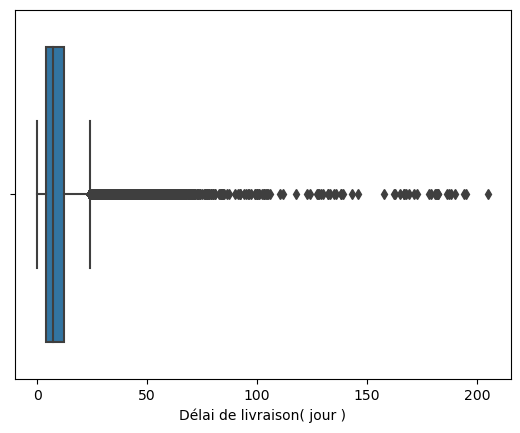

In [73]:
sns.boxplot(data=orders_dataset, x=orders_dataset['delivery_time(H)'] / 24, showfliers=True, orient='h')
plt.xlabel("Délai de livraison( jour )")

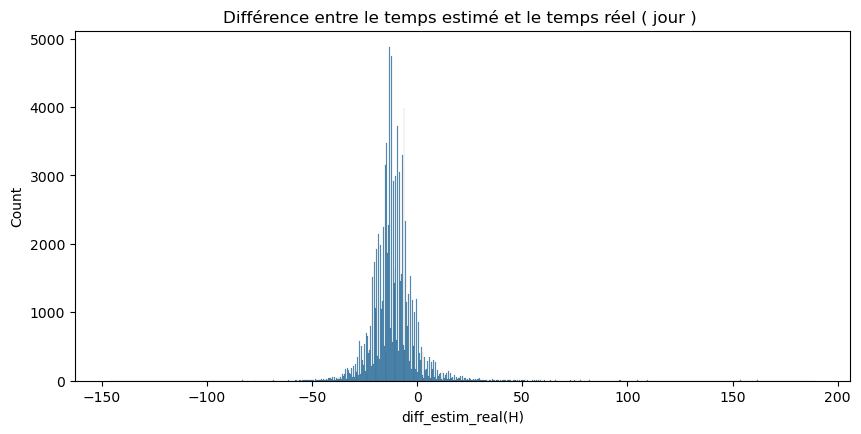

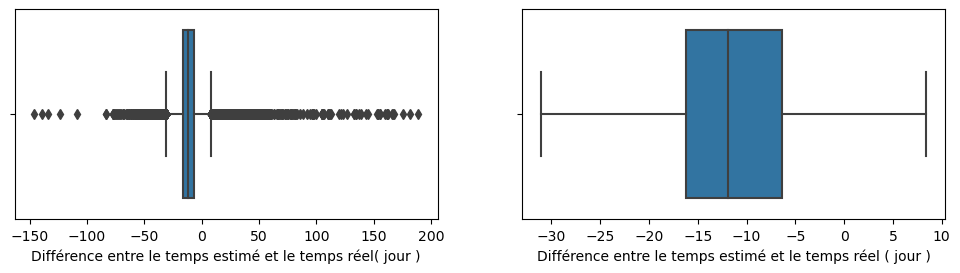

In [74]:
# Différence entre le temps estimé et le temps réel en jour
plt.figure(figsize=(22, 10))

plt.subplot(221)
plt.title("Différence entre le temps estimé et le temps réel ( jour ) ")
sns.histplot((orders_dataset['diff_estim_real(H)']/24).dropna())

plt.figure(figsize=(12, 6))
plt.subplot(223)
sns.boxplot(data=orders_dataset, x=orders_dataset['diff_estim_real(H)'] / 24, showfliers=True, orient='h')
plt.xlabel("Différence entre le temps estimé et le temps réel( jour )")

plt.subplot(224)
sns.boxplot(data=orders_dataset, x=orders_dataset['diff_estim_real(H)'] / 24, showfliers=False, orient='h')
plt.xlabel("Différence entre le temps estimé et le temps réel ( jour )")

plt.show()

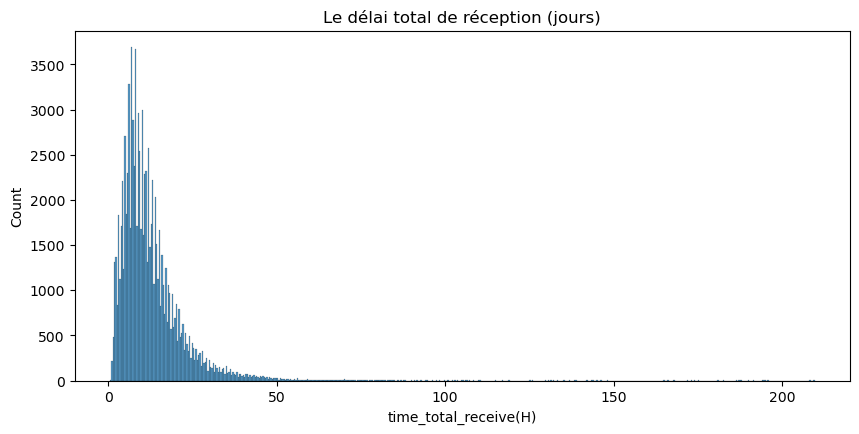

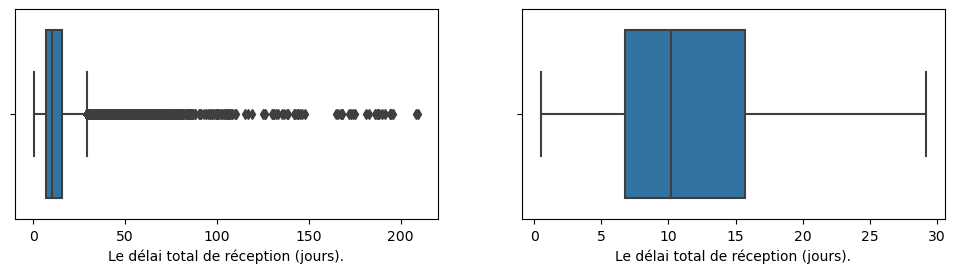

In [75]:
# Le délai total de réception (en jours).'time_total_receive(s)'
plt.figure(figsize=(22, 10))

plt.subplot(221)
plt.title("Le délai total de réception (jours)")
sns.histplot((orders_dataset['time_total_receive(H)']/24).dropna())

plt.figure(figsize=(12, 6))
plt.subplot(223)
sns.boxplot(data=orders_dataset, x=orders_dataset['time_total_receive(H)'] / 24, showfliers=True, orient='h')
plt.xlabel("Le délai total de réception (jours).")

plt.subplot(224)
sns.boxplot(data=orders_dataset, x=orders_dataset['time_total_receive(H)'] / 24, showfliers=False, orient='h')
plt.xlabel("Le délai total de réception (jours).")

plt.show()

In [76]:
print(len(orders_dataset_vis))
orders_dataset_vis.head(1)

96478


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18


In [77]:
print(len(order_items))
order_items.head(1)

112650


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29


In [78]:
#merge les df orders_dataset_vis et order_items pour creer des visualisation
data_vis = pd.merge(orders_dataset_vis, order_items, on = 'order_id', how = 'left' )
data_vis['total_price'] = data_vis['price'] + data_vis['freight_value']
print(len(data_vis))
#print(data_vis.isnull().sum())
data_vis = data_vis[['order_purchase_timestamp', 'total_price']]
data_vis['invoice_day'] = data_vis['order_purchase_timestamp'].apply(lambda x: pd.to_datetime(x).strftime('%Y-%m-%d'))
data_vis['invoice_day'] = pd.to_datetime(data_vis['invoice_day'])
data_vis['year'] = data_vis['order_purchase_timestamp'].dt.year
data_vis['month'] = data_vis['order_purchase_timestamp'].dt.month
data_vis['day'] = data_vis['order_purchase_timestamp'].dt.day

data_vis.head()

110197


,order_purchase_timestamp,total_price,invoice_day,year,month,day
0,2017-10-02 10:56:33,38.71,2017-10-02,2017,10,2
1,2018-07-24 20:41:37,141.46,2018-07-24,2018,7,24
2,2018-08-08 08:38:49,179.12,2018-08-08,2018,8,8
3,2017-11-18 19:28:06,72.20,2017-11-18,2017,11,18
4,2018-02-13 21:18:39,28.62,2018-02-13,2018,2,13


In [79]:
#goupby year month
data_vis_y_month = data_vis.groupby(['year', 'month'])['total_price'].sum()
data_vis_y_month = pd.DataFrame(data_vis_y_month).reset_index().sort_values(by = 'year')
data_vis_y_month

,year,month,total_price
0,2016,9,143.46
1,2016,10,46490.66
2,2016,12,19.62
14,2017,12,843078.29
13,2017,11,1153364.20
12,2017,10,751117.01
10,2017,8,645832.36
9,2017,7,566299.08
11,2017,9,701077.49
7,2017,5,566851.40


In [80]:
#goupby year month day
data_vis_y_month_day = data_vis.groupby(['year', 'month', 'day'])['total_price'].sum()
data_vis_y_month_day = pd.DataFrame(data_vis_y_month_day).reset_index().sort_values(by = 'year')
data_vis_y_month_day

,year,month,day,total_price
0,2016,9,15,143.46
8,2016,10,10,3896.73
7,2016,10,9,2904.19
6,2016,10,8,8475.93
5,2016,10,7,6824.46
...,...,...,...,...
456,2018,3,27,39307.06
457,2018,3,28,31423.56
458,2018,3,29,32832.21
430,2018,3,1,45237.19


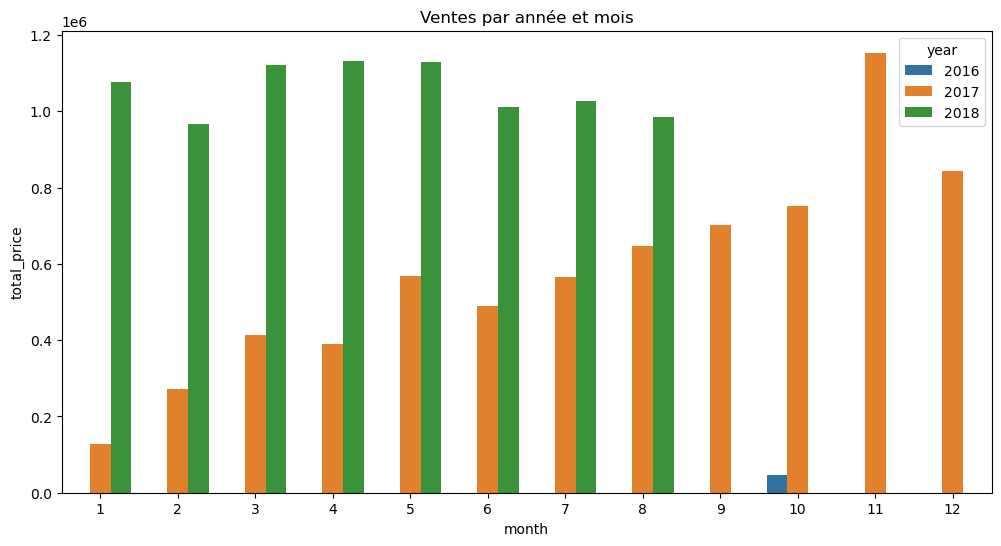

In [81]:
# Faire le barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='total_price', hue='year', data=data_vis_y_month)
plt.title('Ventes par année et mois')
plt.show()


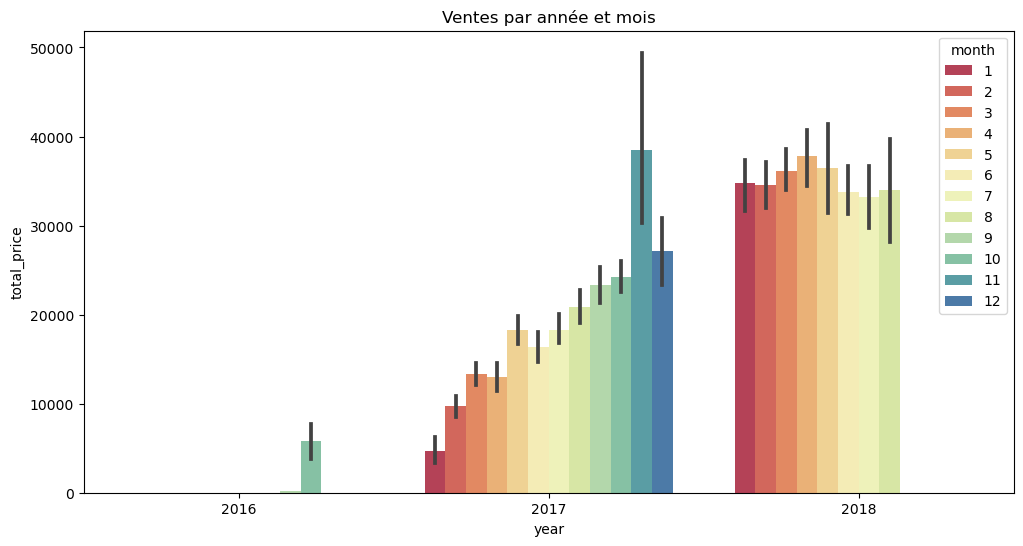

In [82]:
# Faire le barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='total_price', hue='month', data=data_vis_y_month_day, palette="Spectral")
plt.title('Ventes par année et mois')
plt.show()

In [83]:
data_vis_2016 =data_vis_y_month_day[data_vis_y_month_day['year'] == 2016]
data_vis_2017 =data_vis_y_month_day[data_vis_y_month_day['year'] == 2017]
data_vis_2018 =data_vis_y_month_day[data_vis_y_month_day['year'] == 2018]

In [84]:
print(f'total mean --> {data_vis.total_price.mean()} ')
print(f'total median --> {data_vis.total_price.median()}')
print(f'total sum --> {data_vis.total_price.sum()}')

total mean --> 139.92916095719485 
total median --> 92.13
total sum --> 15419773.75


In [85]:
print(f'total mean 2016 --> {data_vis_2016.total_price.mean()} ')
print(f'total median 2016 --> {data_vis_2016.total_price.median()}')
print(f'total sum --> {data_vis_2016.total_price.sum()}')

total mean 2016 --> 4665.374 
total median 2016 --> 5347.815
total sum --> 46653.74


In [86]:
print(f'total mean 2017 --> {data_vis_2017.total_price.mean()} ')
print(f'total median 2017 --> {data_vis_2017.total_price.median()}')
print(f'total sum --> {data_vis_2017.total_price.sum()}')

total mean 2017 --> 19173.22781163435 
total median 2017 --> 17675.37
total sum --> 6921535.24


In [87]:
print(f'total mean 2018 --> {data_vis_2018.total_price.mean()} ')
print(f'total median 2018 --> {data_vis_2018.total_price.median()}')
print(f'total sum --> {data_vis_2018.total_price.sum()}')

total mean 2018 --> 35068.816473029045 
total median 2018 --> 34627.5
total sum --> 8451584.77


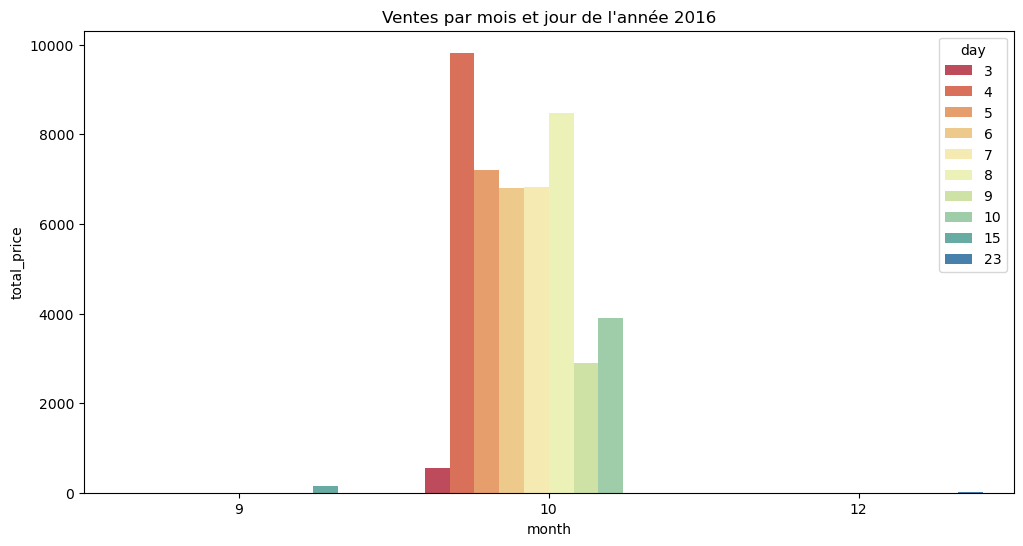

In [88]:
# Faire le barplot
plt.figure(figsize = (12,6))
sns.barplot(x="month", y="total_price", hue="day", data=data_vis_2016, palette="Spectral") #
plt.title('Ventes par mois et jour de l\'année 2016')
plt.show()

In [89]:
month1 = [1,2,3]
month2 = [4,5,6]
month3 = [7,8,9]
month4 = [10,11,12]

data_vis_2017_1 = data_vis_2017[data_vis_2017['month'].isin(month1)]
data_vis_2017_2 = data_vis_2017[data_vis_2017['month'].isin(month2)]
data_vis_2017_3 = data_vis_2017[data_vis_2017['month'].isin(month3)]
data_vis_2017_4 = data_vis_2017[data_vis_2017['month'].isin(month4)]

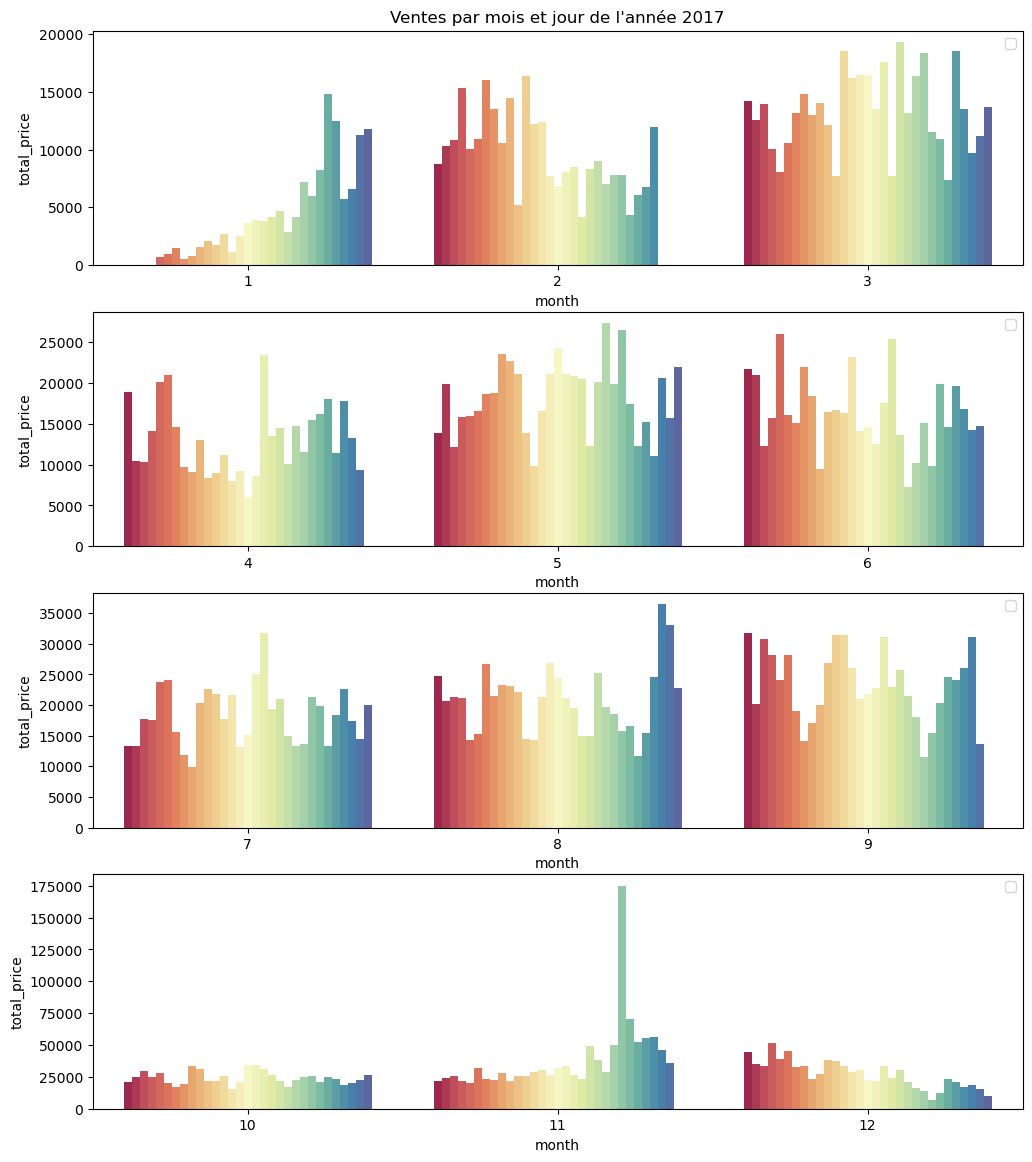

In [90]:
# Faire le barplot
plt.figure(figsize = (12,14))

plt.subplot(411)
sns.barplot(x="month", y="total_price", hue="day", data=data_vis_2017_1, palette="Spectral") #
plt.title('Ventes par mois et jour de l\'année 2017')
plt.legend('')  # Enlever la légende


plt.subplot(412)
sns.barplot(x="month", y="total_price", hue="day", data=data_vis_2017_2, palette="Spectral") #
#plt.title('Ventes par mois et jour annee 2017')
plt.legend('')  # Enlever la légende


plt.subplot(413)
sns.barplot(x="month", y="total_price", hue="day", data=data_vis_2017_3, palette="Spectral") #
#plt.title('Ventes par mois et jour annee 2017')
plt.legend('')  # Enlever la légende


plt.subplot(414)
sns.barplot(x="month", y="total_price", hue="day", data=data_vis_2017_4, palette="Spectral") #
#plt.title('Ventes par mois et jour annee 2017')
plt.legend('')  # Enlever la légende



plt.show()

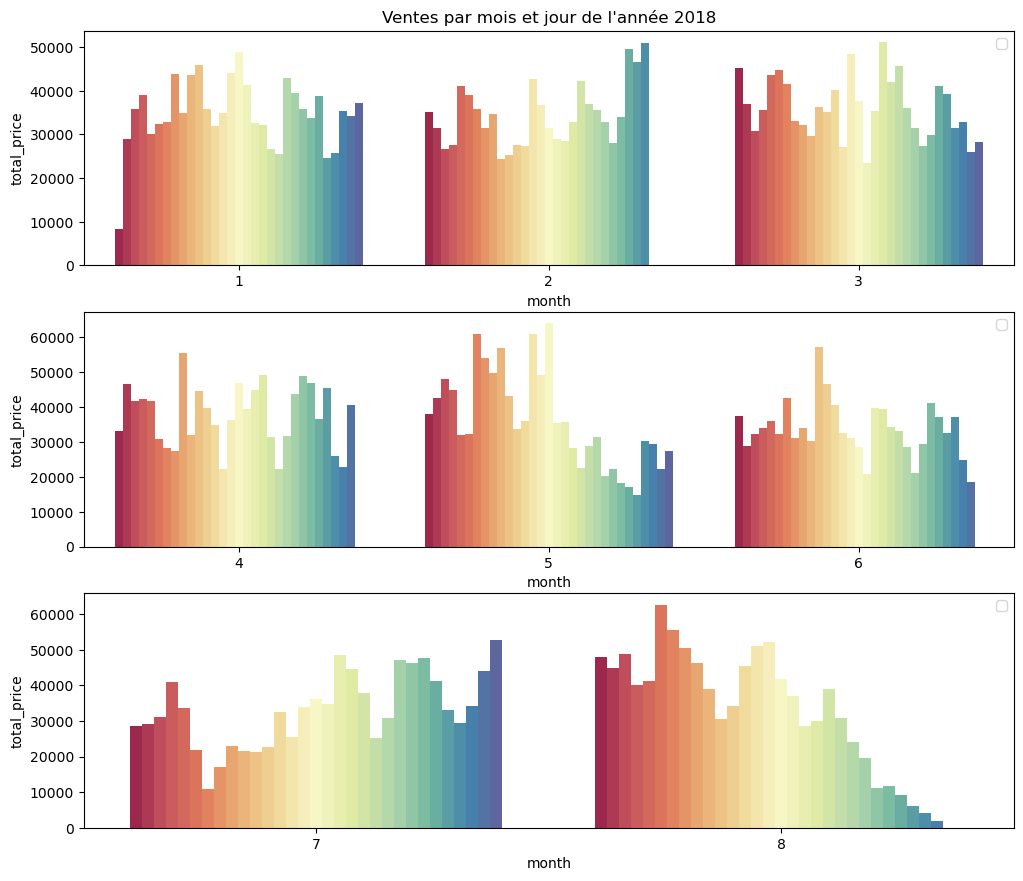

In [91]:
data_vis_2018_1 = data_vis_2018[data_vis_2018['month'].isin(month1)]
data_vis_2018_2 = data_vis_2018[data_vis_2018['month'].isin(month2)]
data_vis_2018_3 = data_vis_2018[data_vis_2018['month'].isin(month3)]
# data_vis_2018_4 = data_vis_2018[data_vis_2018['month'].isin(month4)]

# Faire le barplot
plt.figure(figsize = (12,14))

plt.subplot(411)
sns.barplot(x="month", y="total_price", hue="day", data=data_vis_2018_1, palette="Spectral") #
plt.title('Ventes par mois et jour de l\'année 2018')
plt.legend('')  # Enlever la légende


plt.subplot(412)
sns.barplot(x="month", y="total_price", hue="day", data=data_vis_2018_2, palette="Spectral") #
#plt.title('Ventes par mois et jour de l\'année 2017')
plt.legend('')  # Enlever la légende


plt.subplot(413)
sns.barplot(x="month", y="total_price", hue="day", data=data_vis_2018_3, palette="Spectral") #
#plt.title('Ventes par mois et jour de l\'année 2017')
plt.legend('')  # Enlever la légende


# plt.subplot(414)
# sns.barplot(x="month", y="total_price", hue="day", data=data_vis_2018_4, palette="Spectral") #
# plt.title('Ventes par mois et jour annee 2017')
# plt.legend('')  # Enlever la légende



plt.show()

### 2.2 Combinaison des jeux de données

**Merge pour avoir le category dans le DF**

In [92]:
products_dataset.head()

,product_id,weight_g,category_name,product_volume_cm3
0,1e9e8ef04dbcff4541ed26657ea517e5,225.0,perfumaria,2240.0
1,3aa071139cb16b67ca9e5dea641aaa2f,1000.0,artes,10800.0
2,96bd76ec8810374ed1b65e291975717f,154.0,esporte_lazer,2430.0
3,cef67bcfe19066a932b7673e239eb23d,371.0,bebes,2704.0
4,9dc1a7de274444849c219cff195d0b71,625.0,utilidades_domesticas,4420.0


In [93]:
product_category_name_translation

,category_name,english_name,product_category_name
0,beleza_saude,health_beauty,hygiene_and_beauty
1,informatica_acessorios,computers_accessories,electronics
2,automotivo,auto,auto_leisure
3,cama_mesa_banho,bed_bath_table,decoration
4,moveis_decoracao,furniture_decor,decoration
...,...,...,...
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes,fashion
70,seguros_e_servicos,security_and_services,services
71,pc_gamer,pc_gamer,electronics
72,portateis_cozinha_e_preparadores_de_alimentos,kitchen_utensils,kitchen_utensils


In [94]:
df_categ = pd.merge(products_dataset,product_category_name_translation, on='category_name', how = 'left'  )

df_categ.drop('category_name', axis = 1, inplace = True)
df_categ.head(5)

,product_id,weight_g,product_volume_cm3,english_name,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,225.0,2240.0,perfumery,hygiene_and_beauty
1,3aa071139cb16b67ca9e5dea641aaa2f,1000.0,10800.0,art,culture
2,96bd76ec8810374ed1b65e291975717f,154.0,2430.0,sports_leisure,auto_leisure
3,cef67bcfe19066a932b7673e239eb23d,371.0,2704.0,baby,fashion
4,9dc1a7de274444849c219cff195d0b71,625.0,4420.0,housewares,housewares


In [95]:
#Sélectionnez les colonnes pertinentes
df_categ_id = df_categ.rename(columns = {'english_name':'product_category'}) #[['product_id', 'product_category' ]]

display(HTML("<b>df1 & df2:</b>"))
display(products_dataset.shape, product_category_name_translation.shape )

display(HTML("<br><b>shape:</b>"))
display(df_categ_id.shape)

display(HTML("<b>Null values:</b>"))
display(df_categ_id.isnull().sum())

display(HTML("<br><b>duplicated:</b>"))
display(df_categ_id.duplicated().sum())
display(df_categ_id['product_id'].duplicated().sum())

print('_'*110)

df_categ_id.head(1)

(32951, 4)

(74, 3)

(32951, 5)

product_id                 0
weight_g                   0
product_volume_cm3         0
product_category         502
product_category_name    502
dtype: int64

0

0

______________________________________________________________________________________________________________


,product_id,weight_g,product_volume_cm3,product_category,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,225.0,2240.0,perfumery,hygiene_and_beauty


**Merge pour avoir category_name avec le prix dans le DF**

In [96]:
df_categ_order = pd.merge(order_items, df_categ_id, on ='product_id', how = 'left' )
df_categ_order.drop(['seller_id','shipping_limit_date'], axis = 1, inplace = True )

display(HTML("<b>df1 & df2:</b>"))
display(order_items.shape, df_categ_id.shape )

display(HTML("<br><b>shape:</b>"))
display(df_categ_order.shape)

display(HTML("<b>Null values:</b>"))
display(df_categ_order.isnull().sum())

display(HTML("<br><b>duplicated:</b>"))
display(df_categ_order.duplicated().sum())
display(df_categ_order['order_id'].duplicated().sum())

print('_'*110)

df_categ_order.head(1)

(112650, 7)

(32951, 5)

(112650, 9)

order_id                    0
order_item_id               0
product_id                  0
price                       0
freight_value               0
weight_g                    0
product_volume_cm3          0
product_category         1422
product_category_name    1422
dtype: int64

0

13984

______________________________________________________________________________________________________________


,order_id,order_item_id,product_id,price,freight_value,weight_g,product_volume_cm3,product_category,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,650.0,3528.0,cool_stuff,other


In [97]:
print(f"{df_categ_order['order_id'].duplicated().sum()} commandes ont plus d'un article dans la commande")

13984 commandes ont plus d'un article dans la commande


In [98]:
df_categ_order['order_item_id'].nunique()

21

**Merge pour ajouter les dates dans le DF**

In [99]:
df_categ_order_orderID = pd.merge(df_categ_order, orders_dataset, on= 'order_id', how = 'right'  )

display(HTML("<b>df1 & df2:</b>"))
display(df_categ_order.shape, orders_dataset.shape )

display(HTML("<br><b>shape:</b>"))
display(df_categ_order_orderID.shape)

display(HTML("<b>Null values:</b>"))
display(df_categ_order_orderID.isnull().sum())

display(HTML("<br><b>duplicated:</b>"))
display(df_categ_order_orderID.duplicated().sum())
print('_'*110)

df_categ_order_orderID.head(1)

(112650, 9)

(96478, 10)

(110197, 18)

order_id                       0
order_item_id                  0
product_id                     0
price                          0
freight_value                  0
weight_g                       0
product_volume_cm3             0
product_category            1366
product_category_name       1366
customer_id                    0
order_status                   0
order_purchase_timestamp       0
vendeur_accepte(H)            15
send_time(H)                   2
delivery_time(H)               9
diff_estim_real(H)             8
time_total_receive(H)          8
order_recently(H)              0
dtype: int64

0

______________________________________________________________________________________________________________


,order_id,order_item_id,product_id,price,freight_value,weight_g,product_volume_cm3,product_category,product_category_name,customer_id,order_status,order_purchase_timestamp,vendeur_accepte(H),send_time(H),delivery_time(H),diff_estim_real(H),time_total_receive(H),order_recently(H)
0,e481f51cbdc54678b7cc49136f2d6af7,1,87285b34884572647811a353c7ac498a,29.99,8.72,500.0,1976.0,housewares,housewares,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,0.178333,56.974167,145.503611,-170.579722,202.477778,7972.067778


**Merge pour ajouter les customer_unique_id dans le DF**

In [100]:
df_categ_order_orderID_customers = pd.merge(df_categ_order_orderID, customers, on= 'customer_id', how = 'left' ) 
df_categ_order_orderID_customers.drop('order_status', axis = 1, inplace = True)
display(HTML("<b>df1 & df2:</b>"))
display(df_categ_order_orderID.shape, customers.shape )

display(HTML("<br><b>shape:</b>"))
display(df_categ_order_orderID_customers.shape)

display(HTML("<b>Null values:</b>"))
display(df_categ_order_orderID_customers.isnull().sum())

display(HTML("<br><b>duplicated:</b>"))
display(df_categ_order_orderID_customers.duplicated().sum())
print('_'*110)

df_categ_order_orderID_customers.head(1)

(110197, 18)

(99441, 5)

(110197, 21)

order_id                       0
order_item_id                  0
product_id                     0
price                          0
freight_value                  0
weight_g                       0
product_volume_cm3             0
product_category            1366
product_category_name       1366
customer_id                    0
order_purchase_timestamp       0
vendeur_accepte(H)            15
send_time(H)                   2
delivery_time(H)               9
diff_estim_real(H)             8
time_total_receive(H)          8
order_recently(H)              0
unique_id                      0
zip_code_prefix                0
city                           0
state                          0
dtype: int64

0

______________________________________________________________________________________________________________


,order_id,order_item_id,product_id,price,freight_value,weight_g,product_volume_cm3,product_category,product_category_name,customer_id,order_purchase_timestamp,vendeur_accepte(H),send_time(H),delivery_time(H),diff_estim_real(H),time_total_receive(H),order_recently(H),unique_id,zip_code_prefix,city,state
0,e481f51cbdc54678b7cc49136f2d6af7,1,87285b34884572647811a353c7ac498a,29.99,8.72,500.0,1976.0,housewares,housewares,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,0.178333,56.974167,145.503611,-170.579722,202.477778,7972.067778,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP


**Merge pour ajouter les reviews dans le DF**

In [101]:
df_categ_order_orderID_customers_reviews = pd.merge(df_categ_order_orderID_customers, order_reviews, on ='order_id', how = 'left')
df_categ_order_orderID_customers_reviews.drop(['review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp','review_id'], axis = 1, inplace = True)

display(HTML("<b>df1 & df2:</b>"))
display(df_categ_order_orderID_customers.shape, order_reviews.shape )

display(HTML("<br><b>shape:</b>"))
display(df_categ_order_orderID_customers_reviews.shape)

display(HTML("<b>Null values:</b>"))
display(df_categ_order_orderID_customers_reviews.isnull().sum())

display(HTML("<br><b>INFO:</b>"))
display(df_categ_order_orderID_customers_reviews.info())

display(HTML("<br><b>duplicated:</b>"))
display(df_categ_order_orderID_customers_reviews.duplicated().sum())
print('_'*110)

df_categ_order_orderID_customers_reviews.head(1)

(110197, 21)

(99224, 7)

(110840, 22)

order_id                       0
order_item_id                  0
product_id                     0
price                          0
freight_value                  0
weight_g                       0
product_volume_cm3             0
product_category            1373
product_category_name       1373
customer_id                    0
order_purchase_timestamp       0
vendeur_accepte(H)            15
send_time(H)                   2
delivery_time(H)               9
diff_estim_real(H)             8
time_total_receive(H)          8
order_recently(H)              0
unique_id                      0
zip_code_prefix                0
city                           0
state                          0
review_score                 827
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110840 entries, 0 to 110839
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  110840 non-null  object        
 1   order_item_id             110840 non-null  int64         
 2   product_id                110840 non-null  object        
 3   price                     110840 non-null  float64       
 4   freight_value             110840 non-null  float64       
 5   weight_g                  110840 non-null  float64       
 6   product_volume_cm3        110840 non-null  float64       
 7   product_category          109467 non-null  object        
 8   product_category_name     109467 non-null  object        
 9   customer_id               110840 non-null  object        
 10  order_purchase_timestamp  110840 non-null  datetime64[ns]
 11  vendeur_accepte(H)        110825 non-null  float64       
 12  se

None

391

______________________________________________________________________________________________________________


,order_id,order_item_id,product_id,price,freight_value,weight_g,product_volume_cm3,product_category,product_category_name,customer_id,order_purchase_timestamp,vendeur_accepte(H),send_time(H),delivery_time(H),diff_estim_real(H),time_total_receive(H),order_recently(H),unique_id,zip_code_prefix,city,state,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,1,87285b34884572647811a353c7ac498a,29.99,8.72,500.0,1976.0,housewares,housewares,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,0.178333,56.974167,145.503611,-170.579722,202.477778,7972.067778,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,4.0


In [102]:
# df_categ_order_orderID_customers_reviews_payment = pd.merge(df_categ_order_orderID_customers_reviews, order_payments, on = 'order_id', how = 'left' )
# # df_categ_order_orderID_customers_reviews_payment.drop(['payment_type'], axis= 1, inplace = True)
# df_categ_order_orderID_customers_reviews_payment

**Merge pour ajouter les payments dans le DF**

In [103]:
df_categ_order_orderID_customers_reviews_payment = pd.merge(df_categ_order_orderID_customers_reviews, order_payments, on = 'order_id', how = 'left' )
df_categ_order_orderID_customers_reviews_payment.drop('zip_code_prefix', axis = 1, inplace = True)
display(HTML("<b>df1 & df2:</b>"))
display(df_categ_order_orderID_customers.shape, order_payments.shape )

display(HTML("<br><b>shape:</b>"))
display(df_categ_order_orderID_customers_reviews_payment.shape)

display(HTML("<b>Null values:</b>"))
display(df_categ_order_orderID_customers_reviews_payment.isnull().sum())

display(HTML("<br><b>duplicated:</b>"))
display(df_categ_order_orderID_customers_reviews_payment.duplicated().sum())
print('_'*110)

df_categ_order_orderID_customers_reviews_payment.head(1)

(110197, 21)

(103886, 5)

(115723, 25)

order_id                       0
order_item_id                  0
product_id                     0
price                          0
freight_value                  0
weight_g                       0
product_volume_cm3             0
product_category            1433
product_category_name       1433
customer_id                    0
order_purchase_timestamp       0
vendeur_accepte(H)            15
send_time(H)                   2
delivery_time(H)               9
diff_estim_real(H)             8
time_total_receive(H)          8
order_recently(H)              0
unique_id                      0
city                           0
state                          0
review_score                 861
payment_sequential             3
payment_type                   3
payment_installments           3
payment_value                  3
dtype: int64

411

______________________________________________________________________________________________________________


,order_id,order_item_id,product_id,price,freight_value,weight_g,product_volume_cm3,product_category,product_category_name,customer_id,order_purchase_timestamp,vendeur_accepte(H),send_time(H),delivery_time(H),diff_estim_real(H),time_total_receive(H),order_recently(H),unique_id,city,state,review_score,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,1,87285b34884572647811a353c7ac498a,29.99,8.72,500.0,1976.0,housewares,housewares,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,0.178333,56.974167,145.503611,-170.579722,202.477778,7972.067778,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,4.0,1.0,credit_card,1.0,18.12


In [104]:
df_categ_order_orderID_customers_reviews_payment.columns

Index(['order_id', 'order_item_id', 'product_id', 'price', 'freight_value',
       'weight_g', 'product_volume_cm3', 'product_category',
       'product_category_name', 'customer_id', 'order_purchase_timestamp',
       'vendeur_accepte(H)', 'send_time(H)', 'delivery_time(H)',
       'diff_estim_real(H)', 'time_total_receive(H)', 'order_recently(H)',
       'unique_id', 'city', 'state', 'review_score', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value'],
      dtype='object')

In [105]:
len(df_categ_order_orderID_customers_reviews_payment.columns)

25

In [106]:
# Liste des colonnes dans l'ordre souhaité
new_columns_order = ['order_id', 'order_item_id', 'product_id', 'product_category', 'product_category_name',
                     'price','freight_value', 'customer_id', 'unique_id', 'state', 'city', 'vendeur_accepte(H)', 
                     'send_time(H)', 'delivery_time(H)', 'diff_estim_real(H)',  'time_total_receive(H)', 'order_recently(H)',
                     'payment_sequential', 'payment_type', 'payment_installments', 'payment_value', 'review_score',
                     'weight_g', 'product_volume_cm3', 'order_purchase_timestamp'
                     
                    ] #'review_id', 'cat_electronics', 'cat_furniture', 'cat_food', 'cat_home',
                     #'cat_diy', 'cat_fashion', 'cat_leisure', 'cat_multimedia', 'cat_books', 'cat_hygiene', 
                     #'cat_office', 'cat_miscellaneous', 'cat_unknown'

len(new_columns_order)

25

In [107]:
# Réorganiser les colonnes dans le DataFrame
df_categ_order_orderID_customers_reviews_payment = df_categ_order_orderID_customers_reviews_payment.reindex(columns=new_columns_order)
df_categ_order_orderID_customers_reviews_payment

display(HTML("<b>Null values:</b>"))
display(df_categ_order_orderID_customers_reviews_payment.isnull().sum())

display(HTML("<br><br><b>INFO:</b>"))
display(df_categ_order_orderID_customers_reviews_payment.info())

display(HTML("<br><br><b>Describe:</b>"))
display(df_categ_order_orderID_customers_reviews_payment.describe(include='all'))

display(HTML("<br><br><b>duplicated:</b>"))
display(df_categ_order_orderID_customers_reviews_payment.duplicated().sum())
print('_'*110)

    
df_categ_order_orderID_customers_reviews_payment.head(3)

order_id                       0
order_item_id                  0
product_id                     0
product_category            1433
product_category_name       1433
price                          0
freight_value                  0
customer_id                    0
unique_id                      0
state                          0
city                           0
vendeur_accepte(H)            15
send_time(H)                   2
delivery_time(H)               9
diff_estim_real(H)             8
time_total_receive(H)          8
order_recently(H)              0
payment_sequential             3
payment_type                   3
payment_installments           3
payment_value                  3
review_score                 861
weight_g                       0
product_volume_cm3             0
order_purchase_timestamp       0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115723 entries, 0 to 115722
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  115723 non-null  object        
 1   order_item_id             115723 non-null  int64         
 2   product_id                115723 non-null  object        
 3   product_category          114290 non-null  object        
 4   product_category_name     114290 non-null  object        
 5   price                     115723 non-null  float64       
 6   freight_value             115723 non-null  float64       
 7   customer_id               115723 non-null  object        
 8   unique_id                 115723 non-null  object        
 9   state                     115723 non-null  object        
 10  city                      115723 non-null  object        
 11  vendeur_accepte(H)        115708 non-null  float64       
 12  se

None

,order_id,order_item_id,product_id,product_category,product_category_name,price,freight_value,customer_id,unique_id,state,city,vendeur_accepte(H),send_time(H),delivery_time(H),diff_estim_real(H),time_total_receive(H),order_recently(H),payment_sequential,payment_type,payment_installments,payment_value,review_score,weight_g,product_volume_cm3,order_purchase_timestamp
count,115723,115723.000000,115723,114290,114290,115723.000000,115723.00000,115723,115723,115723,115723,115708.000000,115721.000000,115714.000000,115715.000000,115715.000000,115723.000000,115720.000000,115720,115720.000000,115720.000000,114862.000000,115723.000000,115723.000000,115723
unique,96478,NaN,32216,73,16,NaN,NaN,96478,93358,27,4085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,95956
top,895ab968e7bb0d5659d16cd74cd1650c,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,bed_bath_table,decoration,NaN,NaN,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,SP,sao paulo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,credit_card,NaN,NaN,NaN,NaN,NaN,2017-08-08 20:26:31
freq,63,NaN,529,11825,20670,NaN,NaN,63,75,48816,18299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85372,NaN,NaN,NaN,NaN,NaN,63
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-15 12:16:38
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-29 15:00:37
mean,NaN,1.197048,NaN,NaN,NaN,119.911096,19.98140,NaN,NaN,NaN,NaN,10.430934,78.983580,220.966032,-272.416443,299.704923,5813.081318,1.091272,NaN,2.940572,171.810794,4.080488,2105.689824,15293.706444,NaN
std,NaN,0.701221,NaN,NaN,NaN,182.670252,15.71829,NaN,NaN,NaN,NaN,20.920510,86.718370,207.107966,243.939922,226.768261,3669.477856,0.686737,NaN,2.776111,265.642619,1.347659,3772.255388,23456.694937,NaN
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.00000,NaN,NaN,NaN,NaN,0.000000,0.008889,0.000000,-3504.386944,12.801944,24.000000,1.000000,NaN,0.000000,0.000000,1.000000,0.000000,168.000000,NaN
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.08000,NaN,NaN,NaN,NaN,0.215833,27.427222,97.622014,-391.580000,162.059306,2836.523056,1.000000,NaN,1.000000,60.850000,4.000000,300.000000,2856.000000,NaN


411

______________________________________________________________________________________________________________


,order_id,order_item_id,product_id,product_category,product_category_name,price,freight_value,customer_id,unique_id,state,city,vendeur_accepte(H),send_time(H),delivery_time(H),diff_estim_real(H),time_total_receive(H),order_recently(H),payment_sequential,payment_type,payment_installments,payment_value,review_score,weight_g,product_volume_cm3,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,1,87285b34884572647811a353c7ac498a,housewares,housewares,29.99,8.72,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,SP,sao paulo,0.178333,56.974167,145.503611,-170.579722,202.477778,7972.067778,1.0,credit_card,1.0,18.12,4.0,500.0,1976.0,2017-10-02 10:56:33
1,e481f51cbdc54678b7cc49136f2d6af7,1,87285b34884572647811a353c7ac498a,housewares,housewares,29.99,8.72,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,SP,sao paulo,0.178333,56.974167,145.503611,-170.579722,202.477778,7972.067778,3.0,voucher,1.0,2.00,4.0,500.0,1976.0,2017-10-02 10:56:33
2,e481f51cbdc54678b7cc49136f2d6af7,1,87285b34884572647811a353c7ac498a,housewares,housewares,29.99,8.72,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,SP,sao paulo,0.178333,56.974167,145.503611,-170.579722,202.477778,7972.067778,2.0,voucher,1.0,18.59,4.0,500.0,1976.0,2017-10-02 10:56:33


In [108]:
df_categ_order_orderID_customers_reviews_payment['product_category'].value_counts().head(15)

bed_bath_table           11825
health_beauty             9816
sports_leisure            8792
furniture_decor           8648
computers_accessories     7963
housewares                7196
watches_gifts             6078
telephony                 4608
garden_tools              4483
auto                      4302
toys                      4196
cool_stuff                3922
perfumery                 3506
baby                      3120
electronics               2808
Name: product_category, dtype: int64

**Traitement des valeurs manquantes**

colonne product_category

In [109]:
print(f"Nan mean --> {df_categ_order_orderID_customers_reviews_payment[df_categ_order_orderID_customers_reviews_payment['product_category'].isna()]['price'].mean()}")
print('\n')
print(f"bed_bath_table mean --> {df_categ_order_orderID_customers_reviews_payment[df_categ_order_orderID_customers_reviews_payment['product_category'] == 'bed_bath_table']['price'].mean()}")
print(f"health_beauty mean --> {df_categ_order_orderID_customers_reviews_payment[df_categ_order_orderID_customers_reviews_payment['product_category'] == 'health_beauty']['price'].mean()}")
print(f"sports_leisure mean --> {df_categ_order_orderID_customers_reviews_payment[df_categ_order_orderID_customers_reviews_payment['product_category'] == 'sports_leisure']['price'].mean()}")
print(f"furniture_decor mean --> {df_categ_order_orderID_customers_reviews_payment[df_categ_order_orderID_customers_reviews_payment['product_category'] == 'furniture_decor']['price'].mean()}")
print(f"computers_accessories mean --> {df_categ_order_orderID_customers_reviews_payment[df_categ_order_orderID_customers_reviews_payment['product_category'] == 'computers_accessories']['price'].mean()}")
print(f"housewares mean --> {df_categ_order_orderID_customers_reviews_payment[df_categ_order_orderID_customers_reviews_payment['product_category'] == 'housewares']['price'].mean()}")
print(f"watches_gifts mean --> {df_categ_order_orderID_customers_reviews_payment[df_categ_order_orderID_customers_reviews_payment['product_category'] == 'watches_gifts']['price'].mean()}")
print(f"telephony mean --> {df_categ_order_orderID_customers_reviews_payment[df_categ_order_orderID_customers_reviews_payment['product_category'] == 'telephony']['price'].mean()}")
print(f"garden_tools mean --> {df_categ_order_orderID_customers_reviews_payment[df_categ_order_orderID_customers_reviews_payment['product_category'] == 'garden_tools']['price'].mean()}")
print(f"auto mean --> {df_categ_order_orderID_customers_reviews_payment[df_categ_order_orderID_customers_reviews_payment['product_category'] == 'auto']['price'].mean()}")
print(f"toys mean --> {df_categ_order_orderID_customers_reviews_payment[df_categ_order_orderID_customers_reviews_payment['product_category'] == 'toys']['price'].mean()}")
print(f"cool_stuff mean --> {df_categ_order_orderID_customers_reviews_payment[df_categ_order_orderID_customers_reviews_payment['product_category'] == 'cool_stuff']['price'].mean()}")
print(f"perfumery mean --> {df_categ_order_orderID_customers_reviews_payment[df_categ_order_orderID_customers_reviews_payment['product_category'] == 'perfumery']['price'].mean()}")


Nan mean --> 114.6135380321005


bed_bath_table mean --> 92.64634672304439
health_beauty mean --> 129.96908007334966
sports_leisure mean --> 113.30161055505006
furniture_decor mean --> 87.13370605920443
computers_accessories mean --> 116.35783373100593
housewares mean --> 90.38295997776542
watches_gifts mean --> 199.8445936163212
telephony mean --> 70.67922526041667
garden_tools mean --> 110.25603390586662
auto mean --> 140.46858205485822
toys mean --> 116.43879170638705
cool_stuff mean --> 162.3575446200918
perfumery mean --> 115.70189674843127


In [110]:
df_categ_order_orderID_customers_reviews_payment['product_category'].fillna('not_save', inplace = True) 
df_categ_order_orderID_customers_reviews_payment['product_category_name'].fillna('sports_?_perfumery', inplace = True) 

In [111]:
df_categ_order_orderID_customers_reviews_payment.isnull().sum()


order_id                      0
order_item_id                 0
product_id                    0
product_category              0
product_category_name         0
price                         0
freight_value                 0
customer_id                   0
unique_id                     0
state                         0
city                          0
vendeur_accepte(H)           15
send_time(H)                  2
delivery_time(H)              9
diff_estim_real(H)            8
time_total_receive(H)         8
order_recently(H)             0
payment_sequential            3
payment_type                  3
payment_installments          3
payment_value                 3
review_score                861
weight_g                      0
product_volume_cm3            0
order_purchase_timestamp      0
dtype: int64

In [112]:
nan_list_index = list(df_categ_order_orderID_customers_reviews_payment[df_categ_order_orderID_customers_reviews_payment['delivery_time(H)'].isna()].index)
nan_list_index

[3493, 23993, 51017, 85029, 92051, 96219, 107714, 113567, 114024]

In [113]:
df_categ_order_orderID_customers_reviews_payment.drop(nan_list_index, inplace = True)

In [114]:
df_categ_order_orderID_customers_reviews_payment[df_categ_order_orderID_customers_reviews_payment['delivery_time(H)'].isna()]

,order_id,order_item_id,product_id,product_category,product_category_name,price,freight_value,customer_id,unique_id,state,city,vendeur_accepte(H),send_time(H),delivery_time(H),diff_estim_real(H),time_total_receive(H),order_recently(H),payment_sequential,payment_type,payment_installments,payment_value,review_score,weight_g,product_volume_cm3,order_purchase_timestamp


In [115]:
df_sport_perfumery = df_categ_order_orderID_customers_reviews_payment[df_categ_order_orderID_customers_reviews_payment['product_category_name'] == 'sports_?_perfumery']
df_sport_perfumery

,order_id,order_item_id,product_id,product_category,product_category_name,price,freight_value,customer_id,unique_id,state,city,vendeur_accepte(H),send_time(H),delivery_time(H),diff_estim_real(H),time_total_receive(H),order_recently(H),payment_sequential,payment_type,payment_installments,payment_value,review_score,weight_g,product_volume_cm3,order_purchase_timestamp
126,bfe42c22ecbf90bc9f35cf591270b6a7,1,71225f49be70df4297892f6a5fa62171,not_save,sports_?_perfumery,27.30,15.10,803ac05904124294f8767894d6da532b,34c58672601f2c6d29db7efd1f6bf958,MG,bonfinopolis de minas,0.195556,149.857222,160.344444,-387.722222,310.201667,5152.934167,1.0,credit_card,1.0,42.40,5.0,200.0,352.0,2018-01-27 22:04:34
215,58ac1947c1a9067b9f416cba6d844a3f,1,9820e04e332fc450d6fd975befc1bc28,not_save,sports_?_perfumery,110.00,14.16,ee8e1d37f563ecc11cc4dcb4dfd794c2,5cbf29b2dcf212a6a5d864b887238c72,SP,sao paulo,4.448056,36.020278,167.937222,-74.728611,203.957500,8429.696389,1.0,credit_card,5.0,124.16,5.0,10800.0,48000.0,2017-09-13 09:18:50
268,e22b71f6e4a481445ec4527cb4c405f7,1,3bc5164bc7f4be77002d6651da65c98c,not_save,sports_?_perfumery,22.50,11.74,1faf89c8f142db3fca6cf314c51a37b6,1268b060098ed3f22c2e7c34cc72a1a8,MG,itapagipe,0.215278,53.343056,188.609444,-200.242500,241.952500,11881.205278,1.0,credit_card,3.0,34.24,4.0,550.0,3344.0,2017-04-22 13:48:18
309,a094215e786240fcfefb83d18036a1cd,1,5a848e4ab52fd5445cdc07aab1c40e48,not_save,sports_?_perfumery,122.99,9.06,86acfb656743da0c113d176832c9d535,f5cb81f98962f7504bef1e75579b6dff,SP,americana,0.592500,26.752500,231.782222,-58.519444,258.534722,4868.064444,1.0,credit_card,1.0,132.05,5.0,400.0,3600.0,2018-02-08 18:56:45
381,6f841dde94727854eaff3f66432c80ea,1,c600d7f13104e8db2ca2b9fa78581409,not_save,sports_?_perfumery,168.90,24.05,a9c9532060c9d245f06526c633d2dfba,5f38cc36e507c4d880489be38964af19,RJ,volta redonda,0.196389,22.235278,572.888056,-201.533611,595.123333,5755.667222,1.0,credit_card,3.0,192.95,4.0,2400.0,17010.0,2018-01-02 19:20:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115274,020f8f4df303ae8aa39b806b766d2681,1,b1d207586fca400a2370d50a9ba1da98,not_save,sports_?_perfumery,149.00,14.79,d588273738545bc6a0d30971bf72e938,e883ca09ca9171b6a644ddb4a970ad27,DF,brasilia,0.195556,204.471667,119.530556,-314.017500,324.002222,5909.030000,1.0,credit_card,3.0,163.79,5.0,350.0,704.0,2017-12-27 09:58:49
115289,1a10e938a1c7d8e5eecc3380f71ca76b,1,8d39a63db6a98e40571f486e0c711cf7,not_save,sports_?_perfumery,127.20,18.99,8a81607347c25d881d995d94de6ad824,75fe53e03a8a9797acb680ce8710da8b,RJ,volta redonda,18.195833,50.556944,127.938889,-196.527778,178.495833,870.033889,1.0,boleto,1.0,146.19,5.0,450.0,1232.0,2018-07-25 08:58:35
115468,f0dd9af88d8ef5a8e4670fbbedaf19c4,1,0c877471e35049402bca235e06cb8063,not_save,sports_?_perfumery,84.90,15.35,30ddb50bd22ee927ebe308ea3da60735,1d627d8a6e1e33ea8eeeb7a17d998660,SP,santos,55.761944,290.586667,15.769167,-81.002778,306.355833,8682.368889,1.0,boleto,1.0,100.25,5.0,10750.0,20400.0,2017-09-02 20:38:29
115474,272874573723eec18f23c0471927d778,1,5a848e4ab52fd5445cdc07aab1c40e48,not_save,sports_?_perfumery,122.99,9.06,48e080c8001e92ebea2b64e474f91a60,da59579685bd771fdd4f90fb50d28cd3,SP,guarulhos,0.317778,22.650556,120.665833,-313.507778,143.316389,6063.834444,1.0,credit_card,5.0,132.05,5.0,400.0,3600.0,2017-12-20 23:10:33


In [116]:
#total MonetaryValue
df_categ_order_orderID_customers_reviews_payment['MonetaryValue'] = df_categ_order_orderID_customers_reviews_payment['price'] + df_categ_order_orderID_customers_reviews_payment['freight_value']

df_categ_order_orderID_customers_reviews_payment.drop(['price', 'freight_value'], axis=1, inplace = True)


colonne vendeur_accepte(H)

In [117]:
# cat_list = ['cat_electronics', 'cat_furniture', 'cat_food', 'cat_home', 'cat_diy',
#        'cat_fashion', 'cat_leisure', 'cat_multimedia', 'cat_books',
#        'cat_hygiene', 'cat_office', 'cat_miscellaneous']
# df_categ_order_orderID_customers_reviews_payment.loc[df_categ_order_orderID_customers_reviews_payment['product_category'] == 'sport_perfumery', 'cat_unknown'] = 1
# df_categ_order_orderID_customers_reviews_payment.loc[df_categ_order_orderID_customers_reviews_payment['product_category'] == 'sport_perfumery', cat_list] = 0

In [118]:
vendeur_accepte_median = df_categ_order_orderID_customers_reviews_payment['vendeur_accepte(H)'].median()
vendeur_accepte_median

0.3466666666666667

In [119]:
df_categ_order_orderID_customers_reviews_payment['vendeur_accepte(H)'].fillna('vendeur_accepte_median', inplace=True)

colonne payment_sequential

In [120]:
payment_sequential_median = df_categ_order_orderID_customers_reviews_payment['payment_sequential'].median()
payment_sequential_median

1.0

In [121]:
df_categ_order_orderID_customers_reviews_payment['payment_sequential'].fillna('payment_sequential_median', inplace=True)

colonne payment_sequential_median

In [122]:
df_categ_order_orderID_customers_reviews_payment['payment_type'].mode()


0    credit_card
Name: payment_type, dtype: object

In [123]:
df_categ_order_orderID_customers_reviews_payment['payment_type'].fillna('credit_card', inplace=True)

colonne payment_installments

In [124]:
payment_installments_median = df_categ_order_orderID_customers_reviews_payment['payment_installments'].median()
payment_installments_median

2.0

In [125]:
df_categ_order_orderID_customers_reviews_payment['payment_installments'].fillna(payment_installments_median, inplace=True)

colonne payment_value

In [126]:
payment_value_median = df_categ_order_orderID_customers_reviews_payment['payment_value'].median()

In [127]:
df_categ_order_orderID_customers_reviews_payment['payment_value'].fillna(payment_value_median, inplace=True)

colonne review_score

In [128]:
review_score_median_mode = df_categ_order_orderID_customers_reviews_payment['review_score'].median()
review_score_median_mode

5.0

In [129]:
df_categ_order_orderID_customers_reviews_payment['review_score'].fillna(review_score_median_mode, inplace=True)
# suprrimer des duplicated
df_categ_order_orderID_customers_reviews_payment.drop_duplicates(keep='last', inplace=True)

NaN de DataFrame final:  0
duplicated : 0


<Axes: >

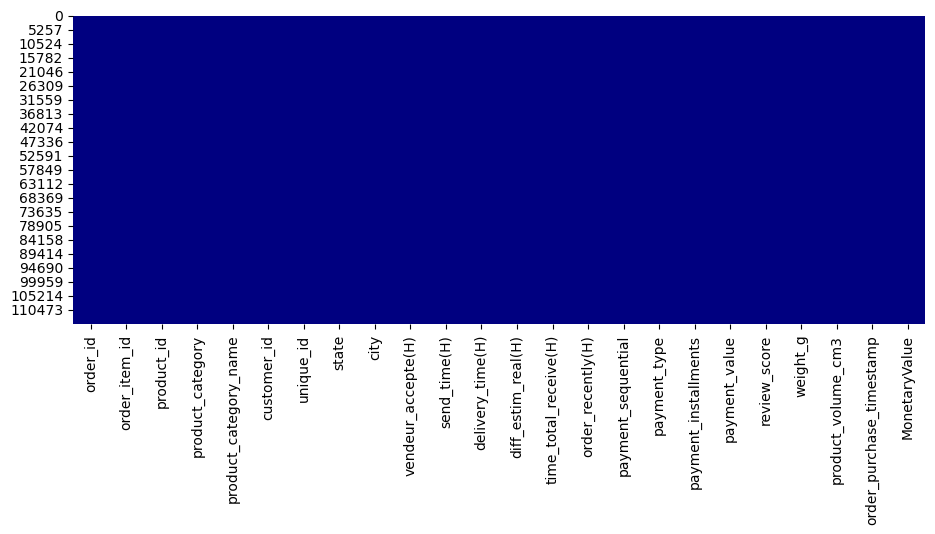

In [130]:
print('NaN de DataFrame final: ' , df_categ_order_orderID_customers_reviews_payment.isna().sum().sum())
print('duplicated :', df_categ_order_orderID_customers_reviews_payment.duplicated().sum())

plt.figure(figsize = (11,4))
sns.heatmap(df_categ_order_orderID_customers_reviews_payment.isna(), cmap=['#000080', '#ADD8E6'], cbar=False)


In [131]:
df_categ_order_orderID_customers_reviews_payment.head(10).T

,0,1,2,3,4,5,6,7,8,9
order_id,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,53cdb2fc8bc7dce0b6741e2150273451,47770eb9100c2d0c44946d9cf07ec65d,949d5b44dbf5de918fe9c16f97b45f8a,ad21c59c0840e6cb83a9ceb5573f8159,a4591c265e18cb1dcee52889e2d8acc3,6514b8ad8028c9f2cc2374ded245783f,76c6e866289321a7c93b82b54852dc33
order_item_id,1,1,1,1,1,1,1,1,1,1
product_id,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,595fac2a385ac33a80bd5114aec74eb8,aa4383b373c6aca5d8797843e5594415,d0b61bfb1de832b15ba9d266ca96e5b0,65266b2da20d04dbe00c5c2d3bb7859e,060cb19345d90064d1015407193c233d,4520766ec412348b8d4caa5e8a18c464,ac1789e492dcd698c5c10b97a671243a
product_category,housewares,housewares,housewares,perfumery,auto,pet_shop,stationery,auto,auto,furniture_decor
product_category_name,housewares,housewares,housewares,hygiene_and_beauty,auto_leisure,garden_outdoors,housewares,auto_leisure,auto_leisure,decoration
customer_id,9ef432eb6251297304e76186b10a928d,9ef432eb6251297304e76186b10a928d,9ef432eb6251297304e76186b10a928d,b0830fb4747a6c6d20dea0b8c802d7ef,41ce2a54c0b03bf3443c3d931a367089,f88197465ea7920adcdbec7375364d82,8ab97904e6daea8866dbdbc4fb7aad2c,503740e9ca751ccdda7ba28e9ab8f608,9bdf08b4b3b52b5526ff42d37d47f222,f54a9f0e6b351c431402b8461ea51999
unique_id,7c396fd4830fd04220f754e42b4e5bff,7c396fd4830fd04220f754e42b4e5bff,7c396fd4830fd04220f754e42b4e5bff,af07308b275d755c9edb36a90c618231,3a653a41f6f9fc3d2a113cf8398680e8,7c142cf63193a1473d2e66489a9ae977,72632f0f9dd73dfee390c9b22eb56dd6,80bb27c7c16e8f973207a5086ab329e2,932afa1e708222e5821dac9cd5db4cae,39382392765b6dc74812866ee5ee92a7
state,SP,SP,SP,BA,GO,RN,SP,PR,RJ,RS
city,sao paulo,sao paulo,sao paulo,barreiras,vianopolis,sao goncalo do amarante,santo andre,congonhinhas,nilopolis,faxinalzinho
vendeur_accepte(H),0.178333,0.178333,0.178333,30.713889,0.276111,0.298056,1.030556,0.218889,0.194722,32.360556


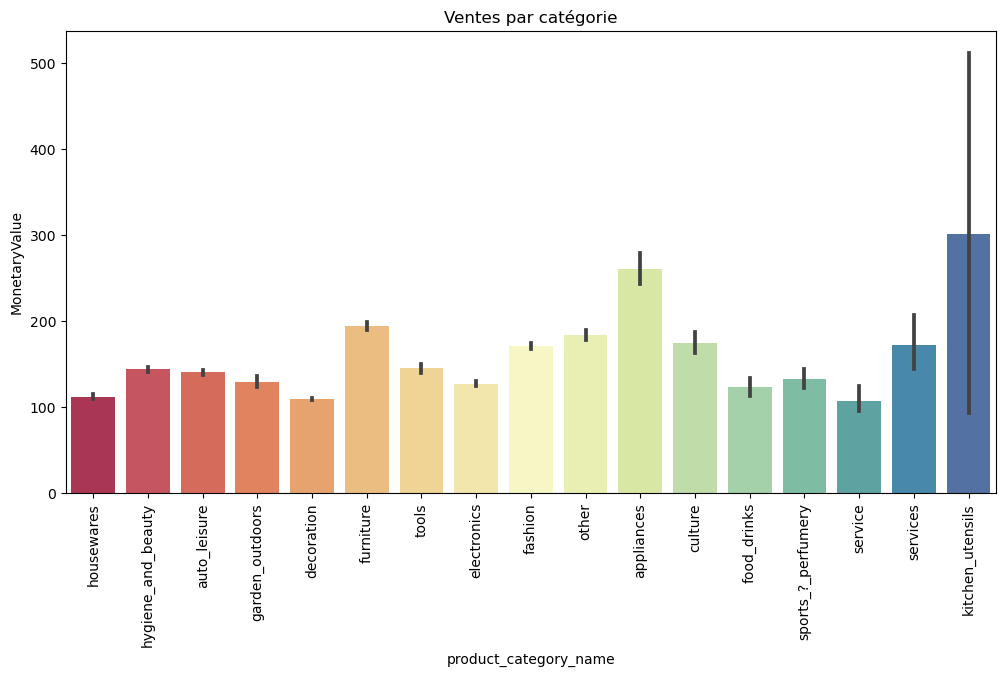

In [132]:
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='product_category_name', y='MonetaryValue', data=df_categ_order_orderID_customers_reviews_payment, palette="Spectral")

# Personnaliser les étiquettes de l'axe x
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=90)

plt.title('Ventes par catégorie')
plt.show()


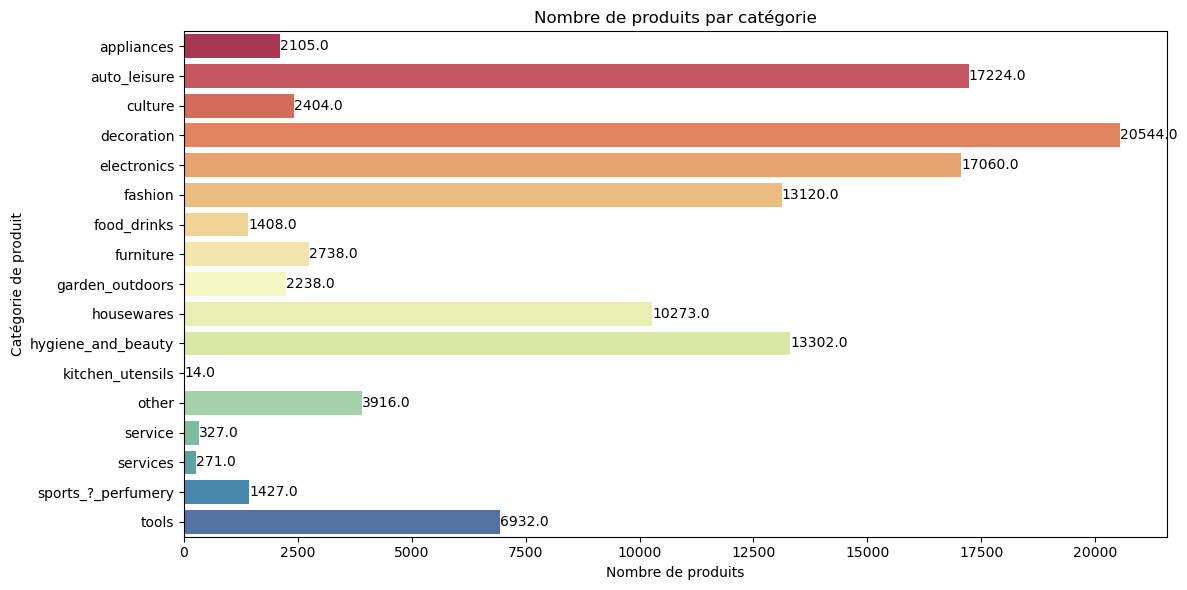

In [133]:
df_count_name = df_categ_order_orderID_customers_reviews_payment.groupby('product_category_name')[['product_id']].count()

# Créer la figure et les axes
plt.figure(figsize=(12, 6))

# Utiliser l'index du DataFrame comme étiquettes de l'axe y
bar_plot = sns.barplot(x=df_count_name['product_id'], y=df_count_name.index, palette='Spectral')

# Ajouter des étiquettes de valeur à droite de chaque barre
for rect in bar_plot.patches:
    width = rect.get_width()
    plt.text(width, rect.get_y() + rect.get_height() / 2, width, ha='left', va='center')

# Personnaliser les axes et le titre
plt.xlabel('Nombre de produits')
plt.ylabel('Catégorie de produit')
plt.title('Nombre de produits par catégorie')

# Afficher la figure
plt.tight_layout()
plt.show()

In [134]:
df_count = df_categ_order_orderID_customers_reviews_payment.groupby('product_category')[['product_id']].count()


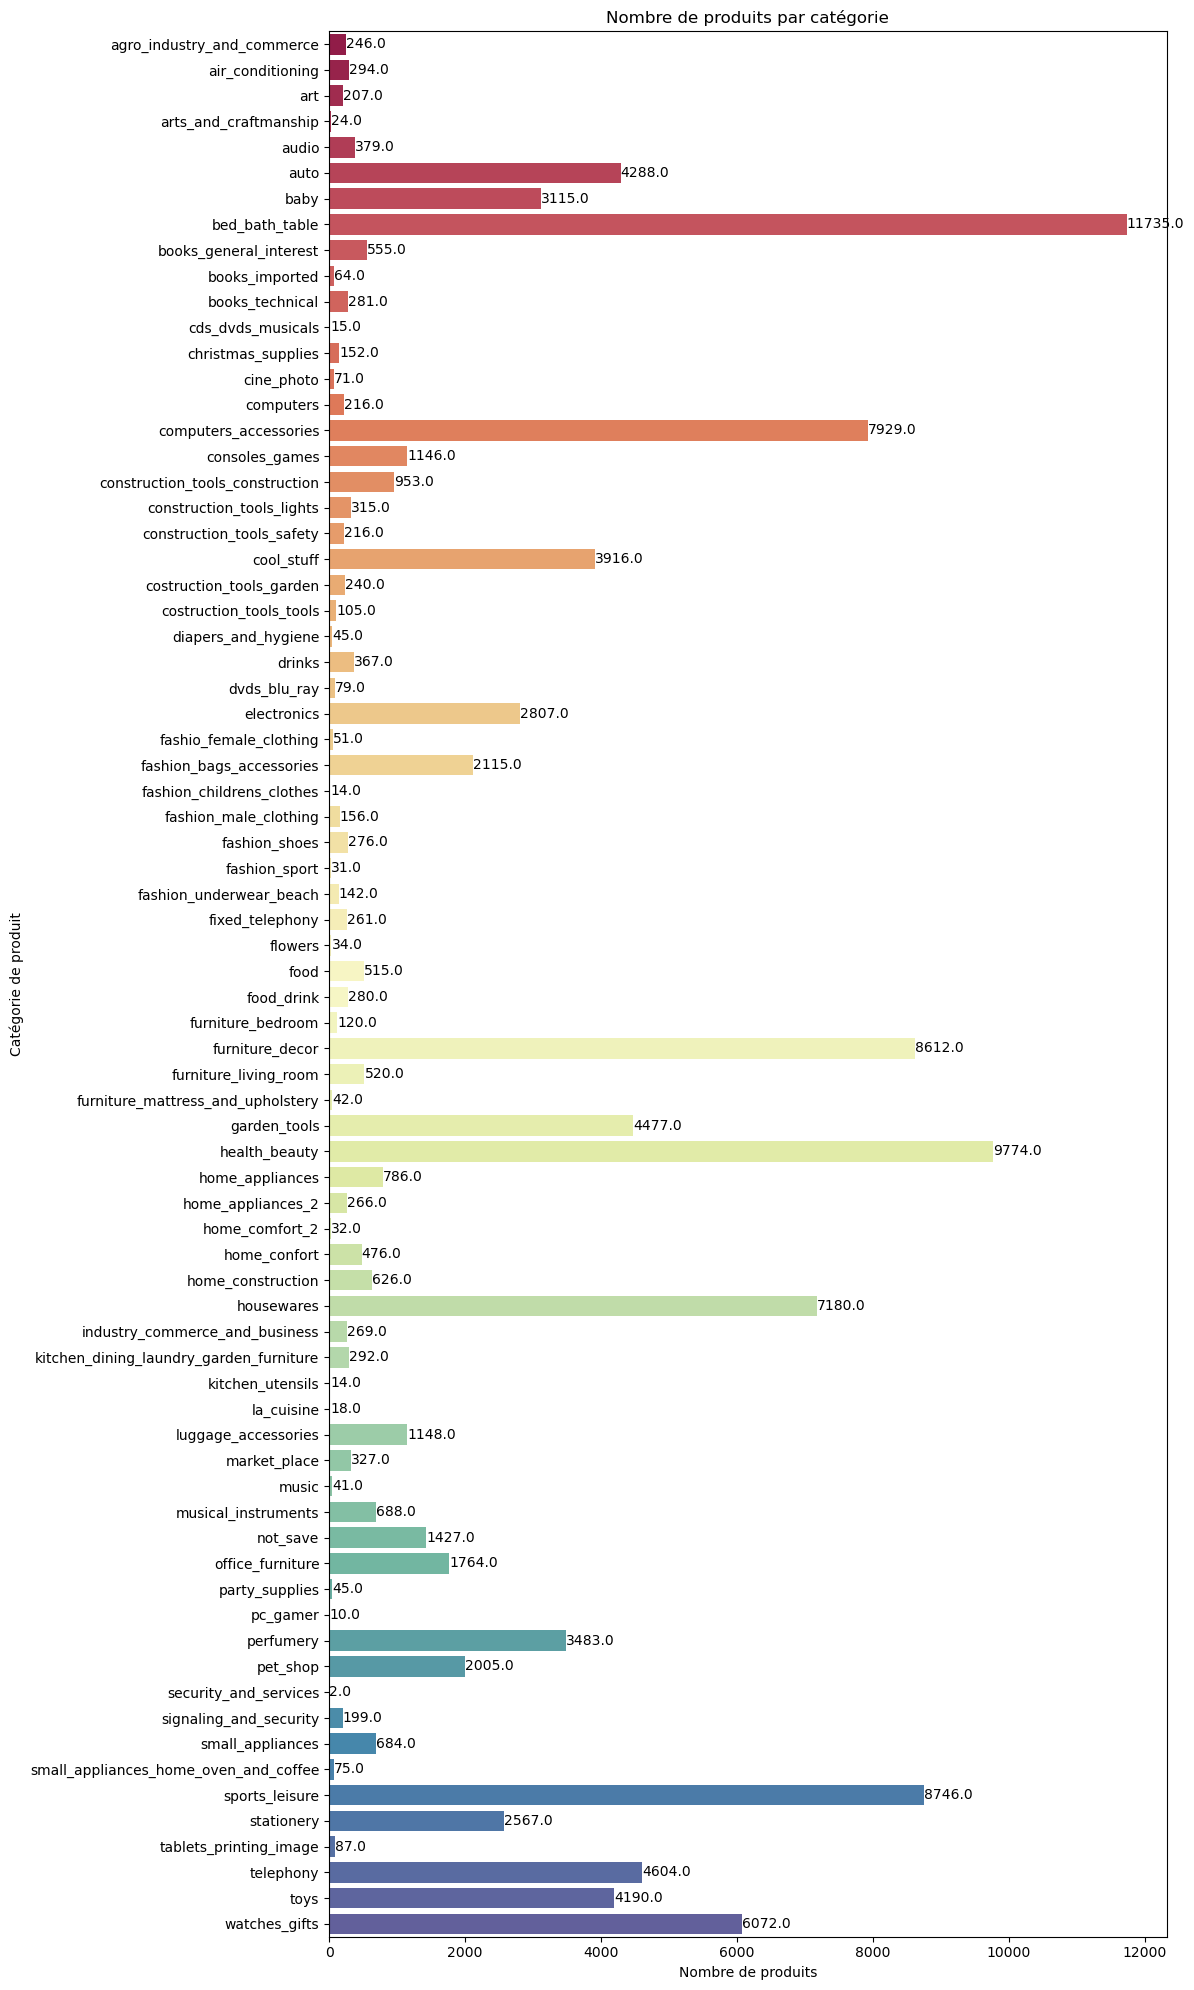

In [135]:
# Créer la figure et les axes
plt.figure(figsize=(12, 20))

# Utiliser l'index du DataFrame comme étiquettes de l'axe y
bar_plot = sns.barplot(x=df_count['product_id'], y=df_count.index, palette='Spectral')

# Ajouter des étiquettes de valeur à droite de chaque barre
for rect in bar_plot.patches:
    width = rect.get_width()
    plt.text(width, rect.get_y() + rect.get_height() / 2, width, ha='left', va='center')

# Personnaliser les axes et le titre
plt.xlabel('Nombre de produits')
plt.ylabel('Catégorie de produit')
plt.title('Nombre de produits par catégorie')

# Afficher la figure
plt.tight_layout()
plt.show()



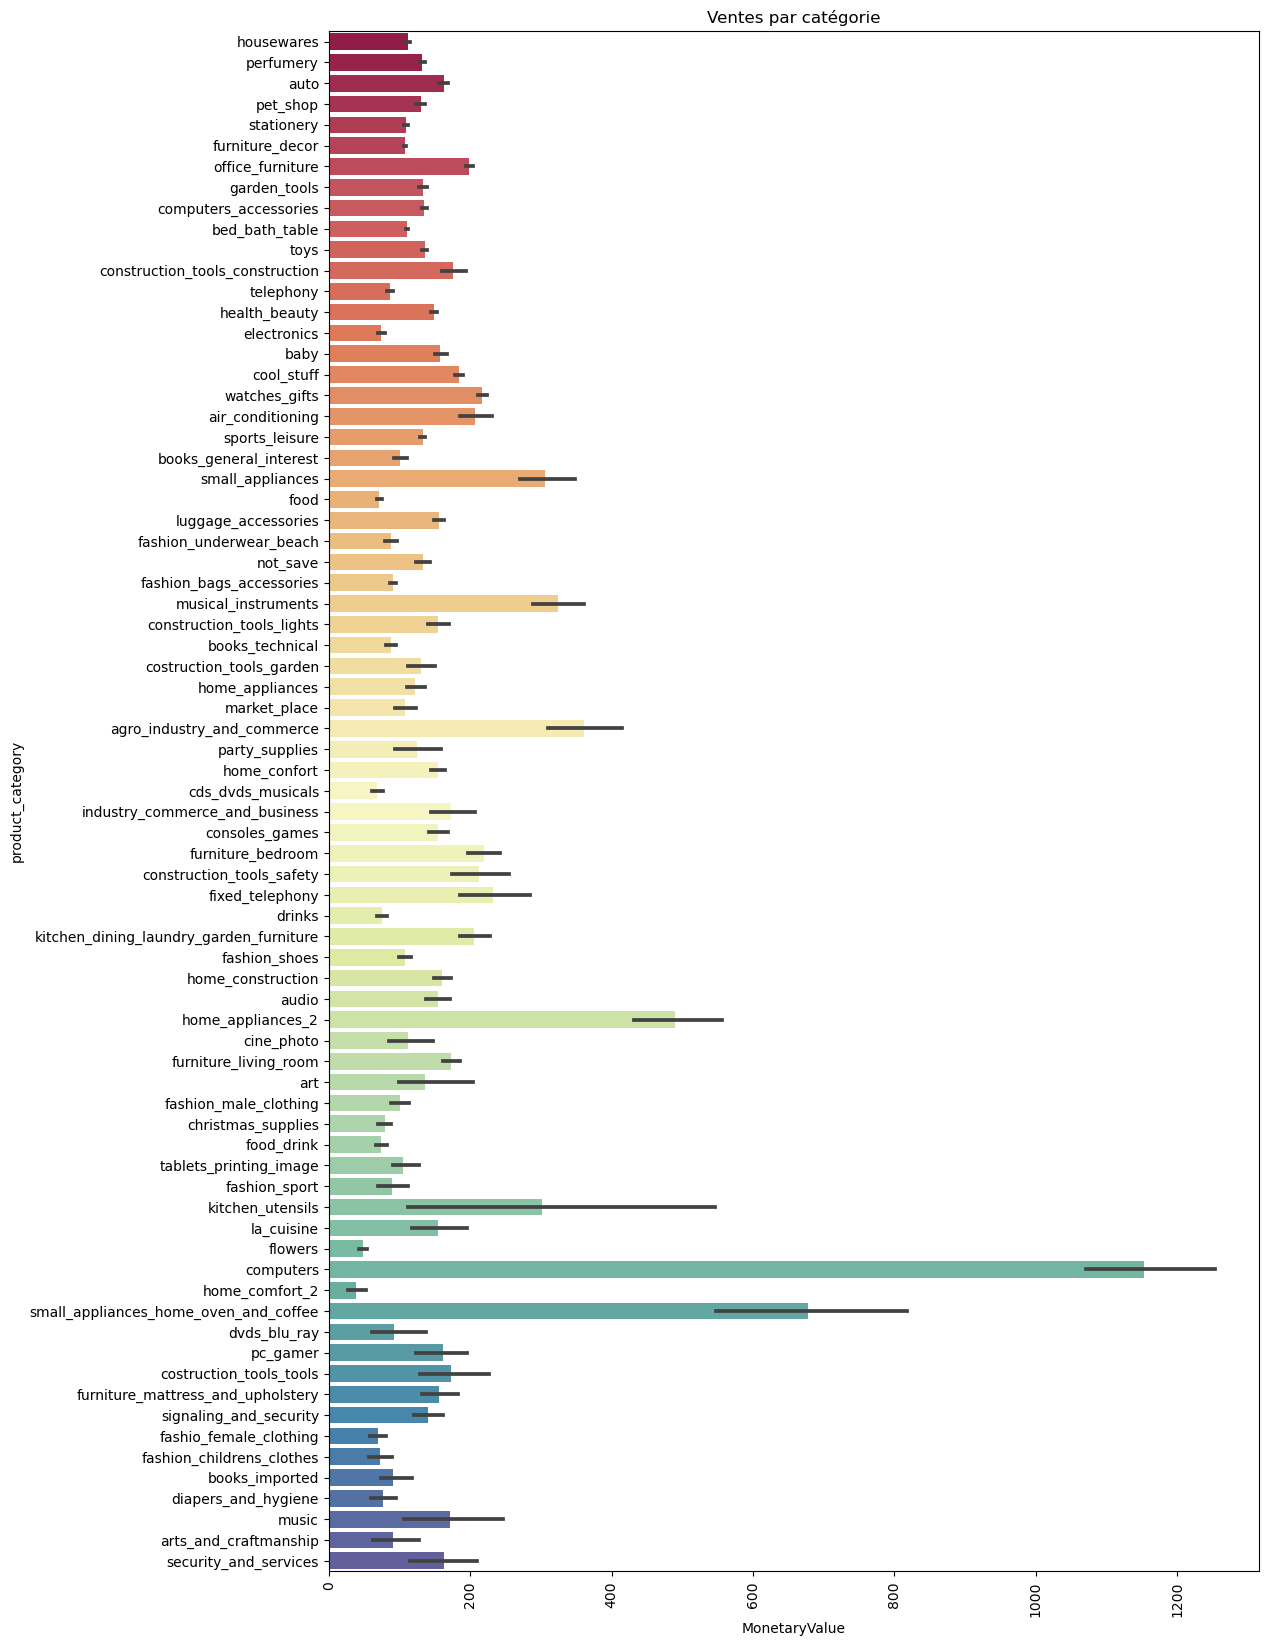

In [136]:
plt.figure(figsize=(12, 20))
bar_plot = sns.barplot(y='product_category', x='MonetaryValue', data=df_categ_order_orderID_customers_reviews_payment, palette="Spectral")

# Personnaliser les étiquettes de l'axe y
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=90)

plt.title('Ventes par catégorie')
plt.show()


In [137]:
dict_agg_plus = {"order_recently(H)":"max",
            "order_id": "nunique",
            "product_id": "count",
            'MonetaryValue' : 'sum',
            'review_score' : 'mean',
            'payment_installments' : 'count',
            #'payment_value' : 'sum',
            "product_category_name" : "nunique",  
            "weight_g":"sum",
            "product_volume_cm3":"sum",
            "order_purchase_timestamp":'max',
   #         "order_purchase_timestamp":'min'
    
            }

In [138]:
work_RFM_plus = df_categ_order_orderID_customers_reviews_payment.groupby("unique_id").agg(dict_agg_plus)
work_RFM_plus.rename(columns = ({'order_recently(H)':'Recency','order_id':'Frequency', 'product_id':'num_product', 'product_category_name':'num_category'}), inplace = True)
work_RFM_plus.T

unique_id,0000366f3b9a7992bf8c76cfdf3221e2,0000b849f77a49e4a4ce2b2a4ca5be3f,0000f46a3911fa3c0805444483337064,0000f6ccb0745a6a4b88665a16c9f078,0004aac84e0df4da2b147fca70cf8255,0004bd2a26a76fe21f786e4fbd80607f,00050ab1314c0e55a6ca13cf7181fecf,00053a61a98854899e70ed204dd4bafe,0005e1862207bf6ccc02e4228effd9a0,0005ef4cd20d2893f0d9fbd94d3c0d97,0006fdc98a402fceb4eb0ee528f6a8d4,00082cbe03e478190aadbea78542e933,00090324bbad0e9342388303bb71ba0a,000949456b182f53c18b68d6babc79c1,000a5ad9c4601d2bbdd9ed765d5213b3,000bfa1d2f1a41876493be685390d6d3,000c8bdb58a29e7115cfc257230fb21b,000d460961d6dbfa3ec6c9f5805769e1,000de6019bb59f34c099a907c151d855,000e309254ab1fc5ba99dd469d36bdb4,000ec5bff359e1c0ad76a81a45cb598f,000ed48ceeb6f4bf8ad021a10a3c7b43,000fbf0473c10fc1ab6f8d2d286ce20c,0010a452c6d13139e50b57f19f52e04e,0010fb34b966d44409382af9e8fd5b77,001147e649a7b1afd577e873841632dd,00115fc7123b5310cf6d3a3aa932699e,0011805441c0d1b68b48002f1d005526,0011857aff0e5871ce5eb429f21cdaf5,0011c98589159d6149979563c504cb21,0012929d977a8d7280bb277c1e5f589d,0014a5a58da615f7b01a4f5e194bf5ea,0015752e079902b12cd00b9b7596276b,00172711b30d52eea8b313a7f2cced02,00191a9719ef48ebb5860b130347bf33,001926cef41060fae572e2e7b30bd2a4,001928b561575b2821c92254a2327d06,00196c4c9a3af7dd2ad10eade69c926f,00196fdb2bf9edfc35e88ebfbcf8d781,0019da6aa6bcb27cc32f1249bd12da05,0019e8c501c85848ac0966d45226fa1d,001a2bf0e46c684031af91fb2bce149d,001a34eb30ecb8e3aacb07c475ca4dd1,001a3a8e11d76c9a366c31a4aa2cc529,001ae5a1788703d64536c30362503e49,001deb796b28a3a128d6113857569aa4,001f3c4211216384d5fe59b041ce1461,002043098f10ba39a4600b6c52fbfe3c,002311514717ca8b65b09a26cdf7b91a,0023557a94bef0038066b5d1b3dc763e,...,ffde9f4d5007c6675904e26947ba4538,ffdf72e25c6f0503bb567d0a8cf1c159,ffdf771c03dd683f1ed7017ae4e9efb2,ffdffea8a4b04f14987bfef2a2287fa9,ffe0c10afc687bcf34a0451f2b87dd9b,ffe204b1bb8026741b839085b2fd10f2,ffe254cc039740e17dd15a5305035928,ffe2dd1f3b0cbf0b5f35e818ec03c49b,ffe39c116d96cd81dcdfd9dcca655cd1,ffe3e199b9d0b7fb7d2d29a5b9498447,ffe4c3aa14d4702fb11fe5b3c4dd755c,ffe4d6bcc48632f0bb1bedf53702cc4b,ffe6efca3c7e6a06bad0a6a883280a93,ffe76cb2f4bb39384c432d65ece67441,ffe7752edcf14b5819058b1948e02f3a,ffe780a8995715d9560ca10f3351710f,ffe8f2fc0cee48f79934bd2c506fafc0,ffe9102bb78a76921ba0ff3c4659616a,ffe96201d466b0e0dc8139850be29d5d,ffe96c782a5bc522bd8bad3bc638981a,ffe9be10b9a58c5464d833e8b1b2c632,ffe9e41fbd14db4a7361347c56af5447,ffeb904468642a1ce663a322629801cb,ffebb6424578e7bb153322da9d65634f,ffec10ad4229ba46818560e1c8b40a68,ffec490ab531184a483efe2eedd68908,ffecceca389973ef16660d58696f281e,ffeddf8aa7cdecf403e77b2e9a99e2ea,ffedff0547d809c90c05c2691c51f9b7,ffee94d548cef05b146d825a7648dab4,ffeefd086fc667aaf6595c8fe3d22d54,ffef0ffa736c7b3d9af741611089729b,fff1afc79f6b5db1e235a4a6c30ceda7,fff1bdd5c5e37ca79dd74deeb91aa5b6,fff22793223fe80c97a8fd02ac5c6295,fff2ae16b99c6f3c785f0e052f2a9cfb,fff3a9369e4b7102fab406a334a678c3,fff3e1d7bc75f11dc7670619b2e61840,fff5eb4918b2bf4b2da476788d42051c,fff699c184bcc967d62fa2c6171765f7,fff7219c86179ca6441b8f37823ba3d3,fff96bc586f78b1f070da28c4977e810,fffa431dd3fcdefea4b1777d114144f2,fffb09418989a0dbff854a28163e47c6,fffbf87b7a1a6fa8b03f081c5f51a201,fffcf5a5ff07b0908bd4e2dbc735a684,fffea47cd6d3cc0a88bd621562a9d061,ffff371b4d645b6ecea244b27531430a,ffff5962728ec6157033ef9805bacc48,ffffd2657e2aad2907e67c3e9daecbeb
Recency,2692.069444,2763.819444,12905.926111,7722.515556,6931.248611,3523.455833,3170.053889,4395.748889,13047.473611,4103.640278,9797.624167,6815.643056,3816.265556,3101.080833,9217.256111,8040.2275,6256.117222,5632.02,9067.834444,1589.111111,219.436389,2446.575278,845.279167,9963.631667,4269.862222,8733.794722,14057.033889,11833.396944,10275.866389,9360.863889,7607.233611,5370.183611,668.612778,806.613333,11955.474444,9074.080556,137.726944,797.523611,4531.898056,4814.085278,2909.584722,10240.28,1195.178611,2437.603333,6363.464722,1654.885556,12692.433611,12526.243889,1539.434167,3715.123056,...,1908.721111,6336.640833,789.739722,8427.941389,4865.035556,503.994167,12358.45194

In [139]:
work_RFM_plus['Frequency'].unique()

array([ 1,  2,  3,  4,  6,  7,  5,  9, 15], dtype=int64)

In [140]:
work_RFM_plus['num_product'].unique()

array([ 1,  2,  4,  3,  7,  5,  6, 12, 15,  8, 10, 18, 11,  9, 14, 24, 19,
       22, 20, 21, 26, 16, 38, 13, 75, 35], dtype=int64)

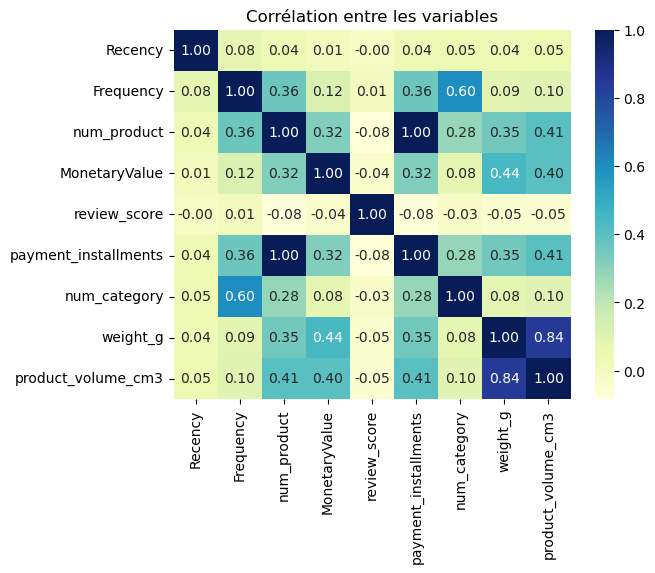

In [141]:
# Calculer les corrélations entre les variables
correlation_matrix = work_RFM_plus.corr()

# Afficher la carte de chaleur des corrélations
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True, fmt=".2f")

# Ajouter un titre au graphique
plt.title("Corrélation entre les variables")

# Afficher le graphique
plt.show()

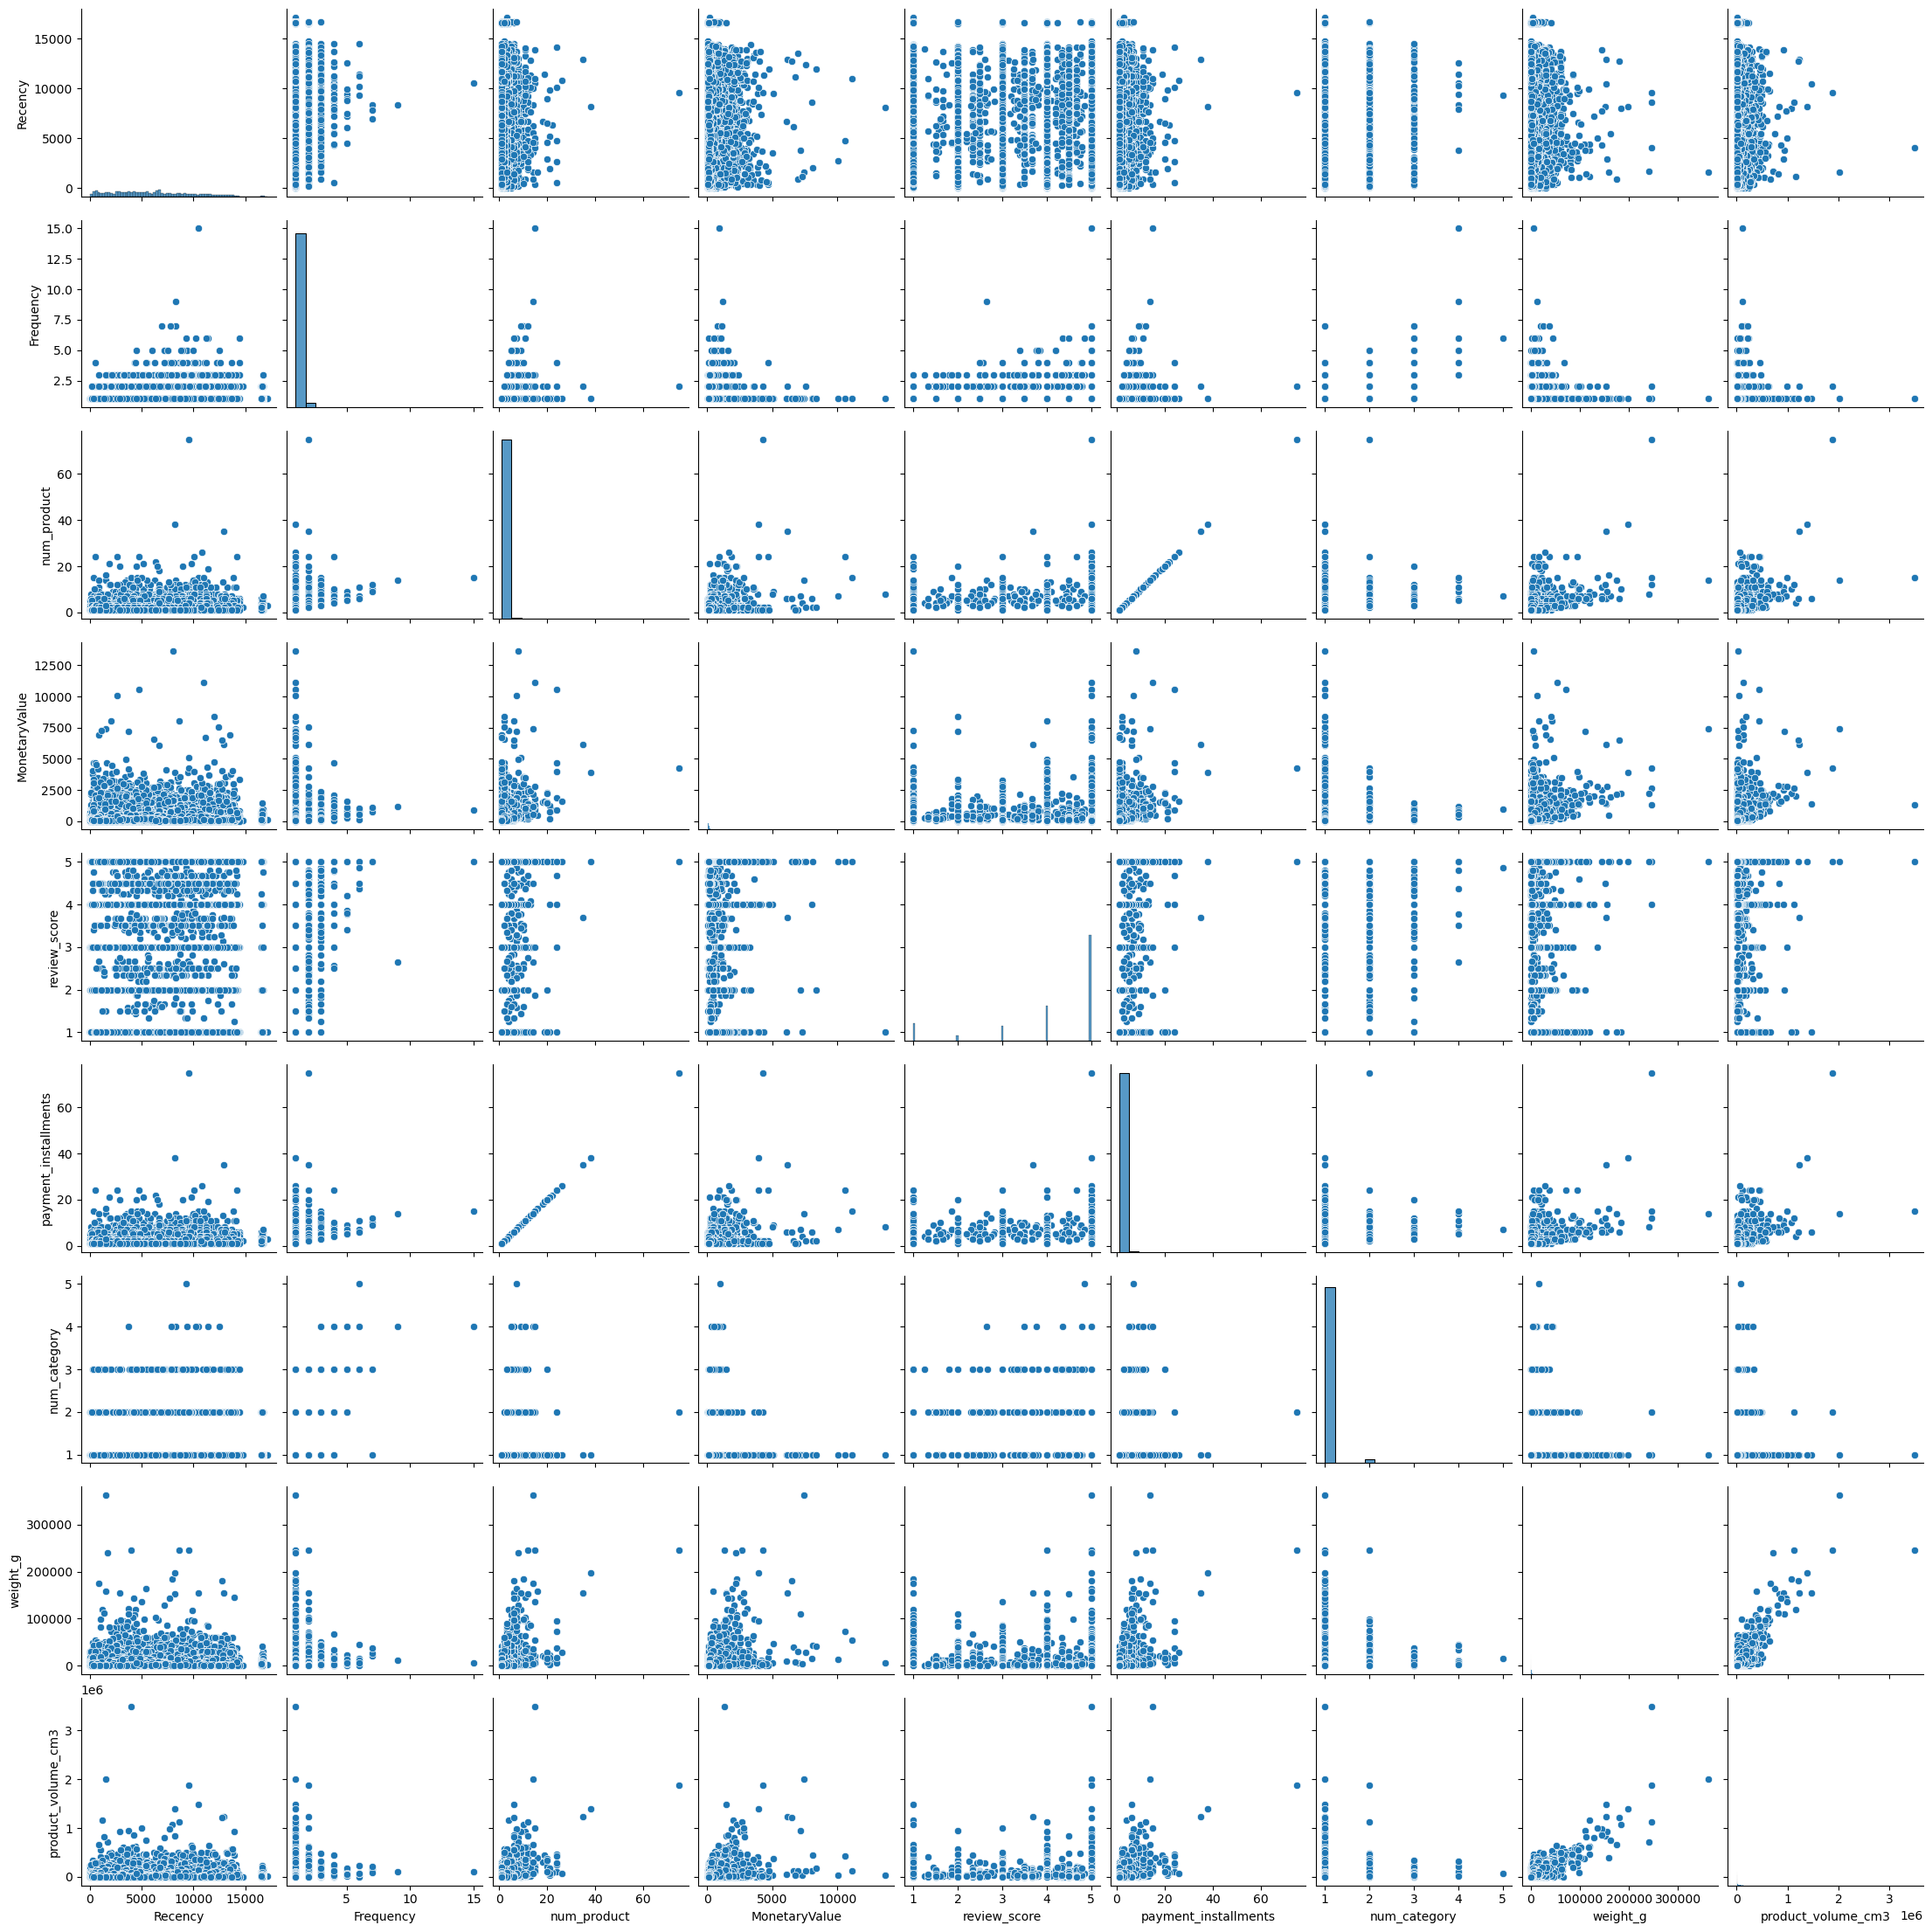

In [142]:
sns.pairplot(work_RFM_plus)

**Création d'une segmentation RFM(Recency, Frequency, MonetaryValue)**

In [143]:
dict_agg = {"order_recently(H)":"max",
            "order_id": "nunique",
            'MonetaryValue' : 'sum',
            }

work_RFM = df_categ_order_orderID_customers_reviews_payment.groupby("unique_id").agg(dict_agg)
work_RFM.rename(columns = ({'order_recently(H)':'Recency','order_id':'Frequency'}), inplace = True)
work_RFM

,Recency,Frequency,MonetaryValue
unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,2692.069444,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,2763.819444,1,27.19
0000f46a3911fa3c0805444483337064,12905.926111,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,7722.515556,1,43.62
0004aac84e0df4da2b147fca70cf8255,6931.248611,1,196.89
...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,10746.000278,1,2067.42
fffea47cd6d3cc0a88bd621562a9d061,6306.878056,1,84.58
ffff371b4d645b6ecea244b27531430a,13655.189167,1,112.46


In [144]:
#Telechager le df
work_RFM_plus.to_csv('df_rfm_plus.csv') #, index=False
work_RFM.to_csv('df_rfm.csv') #, index=False
